In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import importlib

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
column_full_names = [
    "Уровень преступности на душу населения по городам",
    "Доля жилой земли, отведенной под участки площадью более 25 000 кв. футов",
    "Доля акров нерозничного бизнеса по городам",
    "Фиктивная переменная реки Чарльз (1 если участок граничит с рекой; 0 в противном случае)",
    "Концентрация оксидов азота (частей на 10 миллионов)",
    "Среднее количество комнат в жилище",
    "Доля домов, занятых владельцами, построенных до 1940 года",
    "Взвешенные расстояния до пяти бостонских центров занятости",
    "Индекс доступности к радиальным highways",
    "Полная ставка налога на имущество за $10,000",
    "Соотношение учеников и учителей по городам",
    "1000(Bk - 0,63)², где Bk - доля чернокожего населения по городам",
    "процент населения с низким социально-экономическим статусом",
    "Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000)"
]
data = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_full_names)
#data_full_name = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_full_names)
print(data.head(5))




   Уровень преступности на душу населения по городам  \
0                                            0.00632   
1                                            0.02731   
2                                            0.02729   
3                                            0.03237   
4                                            0.06905   

   Доля жилой земли, отведенной под участки площадью более 25 000 кв. футов  \
0                                               18.0                          
1                                                0.0                          
2                                                0.0                          
3                                                0.0                          
4                                                0.0                          

   Доля акров нерозничного бизнеса по городам  \
0                                        2.31   
1                                        7.07   
2                                        

Уровень преступности на душу населения по городам


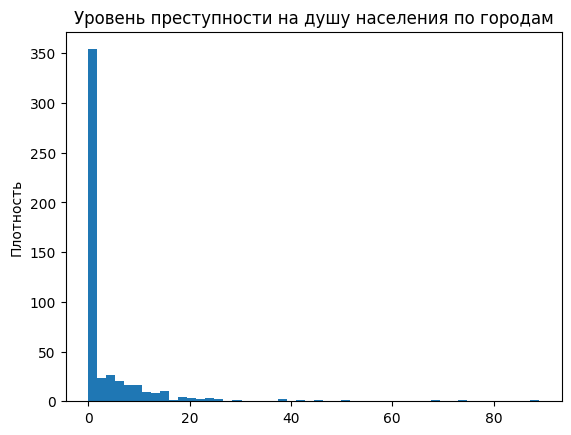

Доля жилой земли, отведенной под участки площадью более 25 000 кв. футов


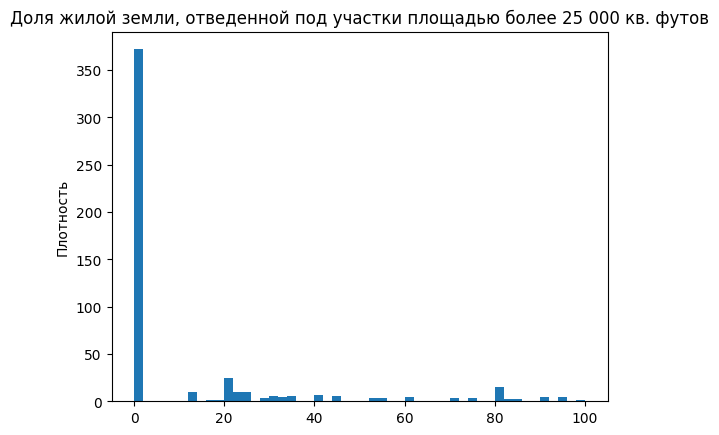

Доля акров нерозничного бизнеса по городам


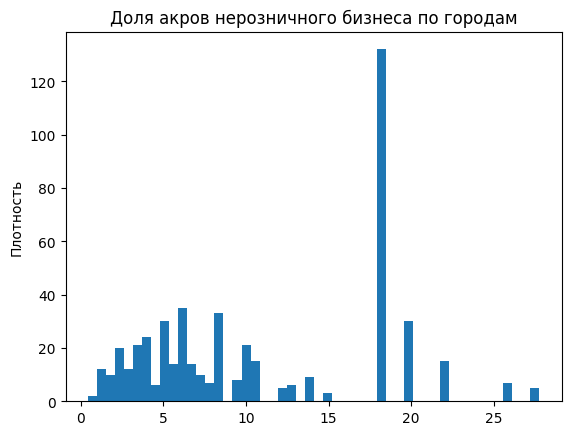

Фиктивная переменная реки Чарльз (1 если участок граничит с рекой; 0 в противном случае)


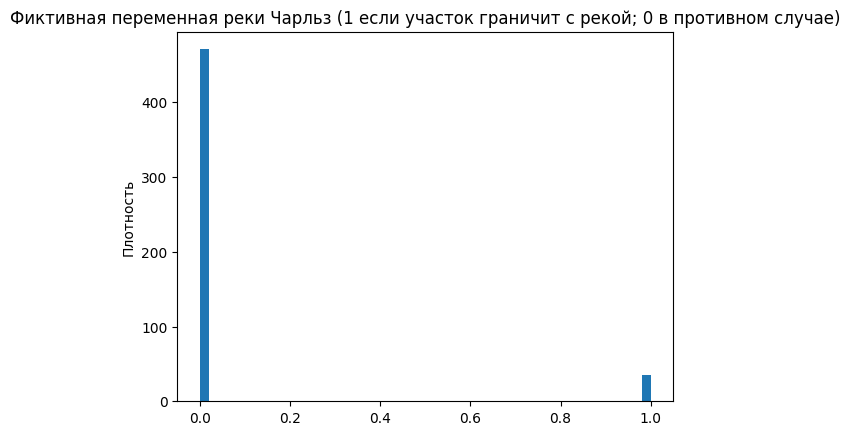

Концентрация оксидов азота (частей на 10 миллионов)


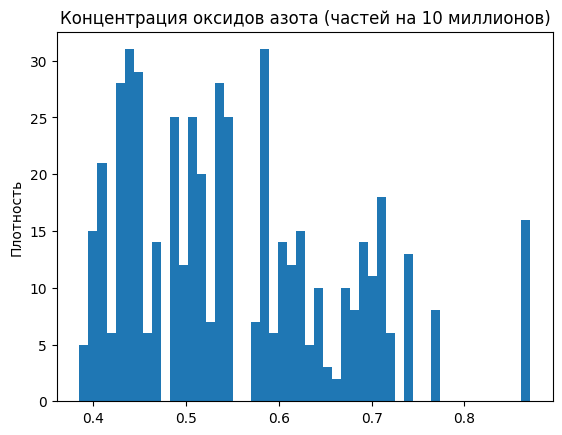

Среднее количество комнат в жилище


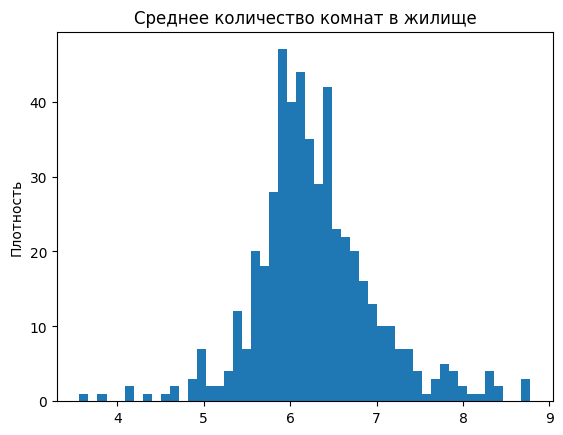

Доля домов, занятых владельцами, построенных до 1940 года


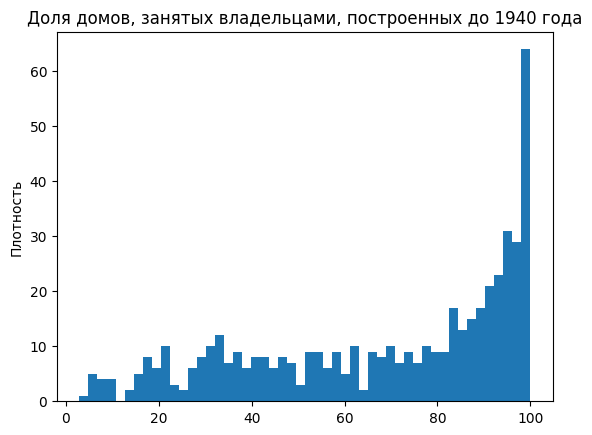

Взвешенные расстояния до пяти бостонских центров занятости


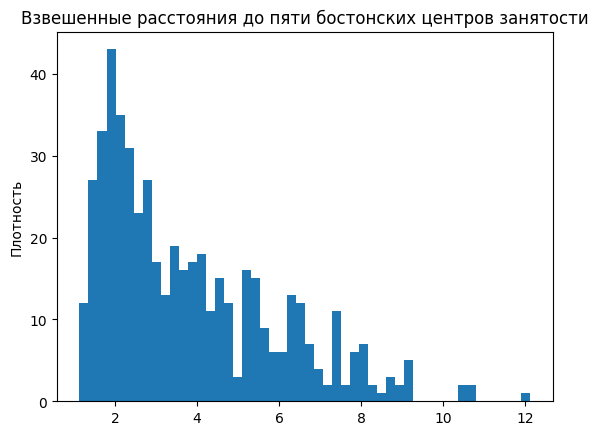

Индекс доступности к радиальным highways


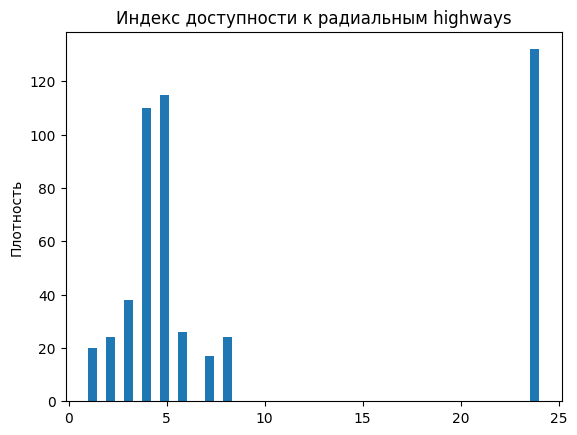

Полная ставка налога на имущество за $10,000


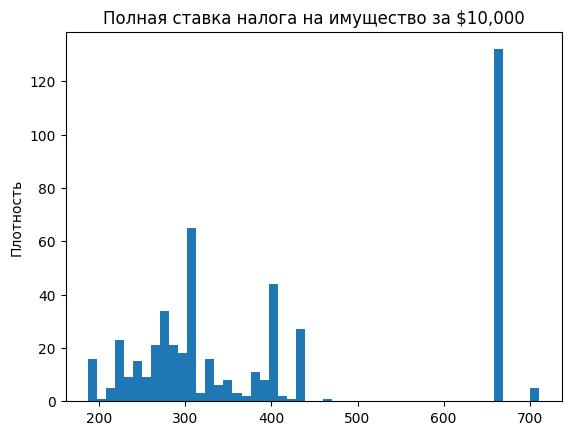

Соотношение учеников и учителей по городам


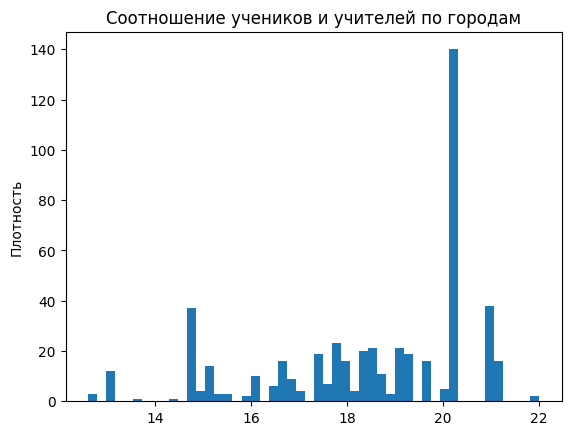

1000(Bk - 0,63)², где Bk - доля чернокожего населения по городам


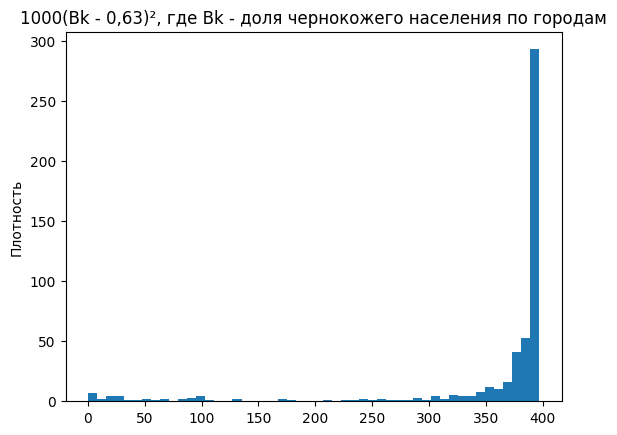

процент населения с низким социально-экономическим статусом


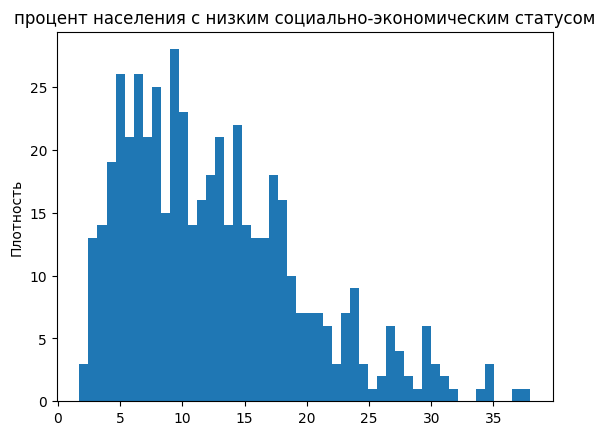

Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000)


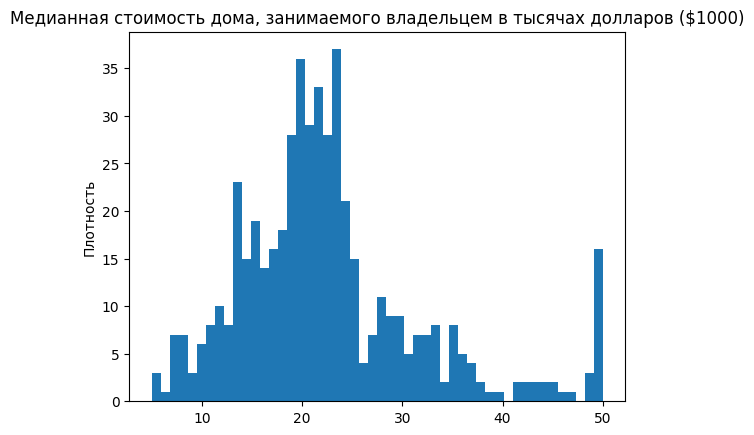

In [58]:
for row in data:
    print(row)
    data[row].plot.hist(bins=50, title=F"{row}", ylabel='Плотность')
    plt.show()


Отображаю гистограмму и KDE накладывая друг на друга по каждому параметру

Уровень преступности на душу населения по городам


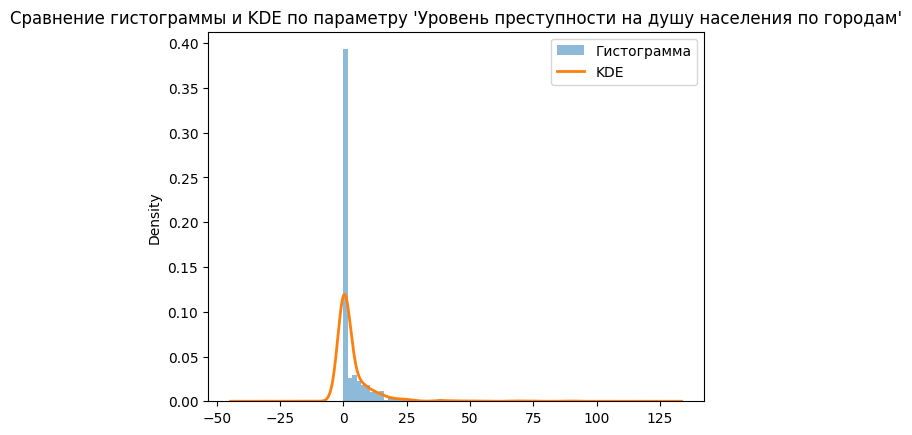

Доля жилой земли, отведенной под участки площадью более 25 000 кв. футов


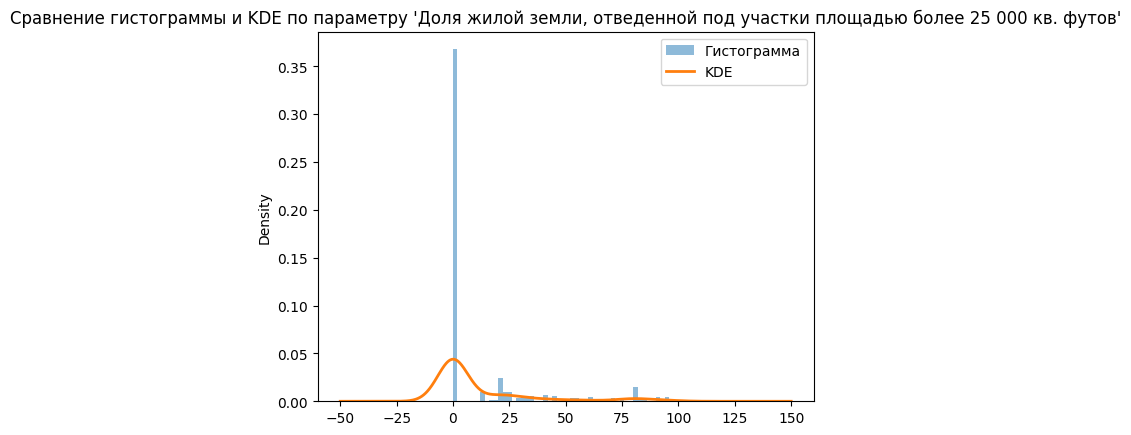

Доля акров нерозничного бизнеса по городам


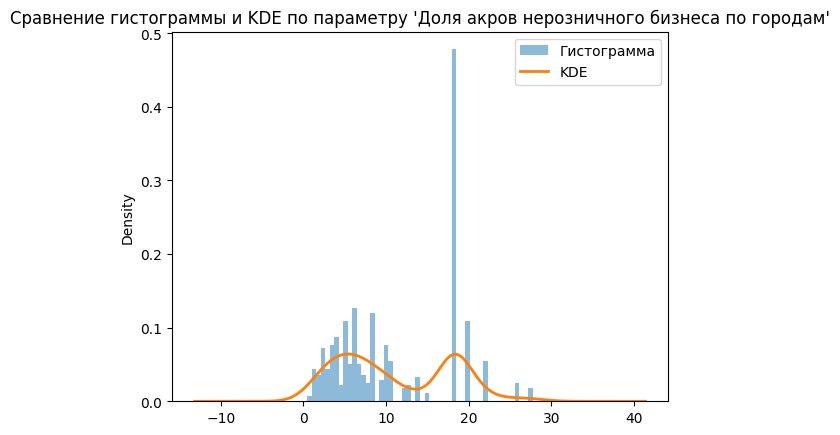

Фиктивная переменная реки Чарльз (1 если участок граничит с рекой; 0 в противном случае)


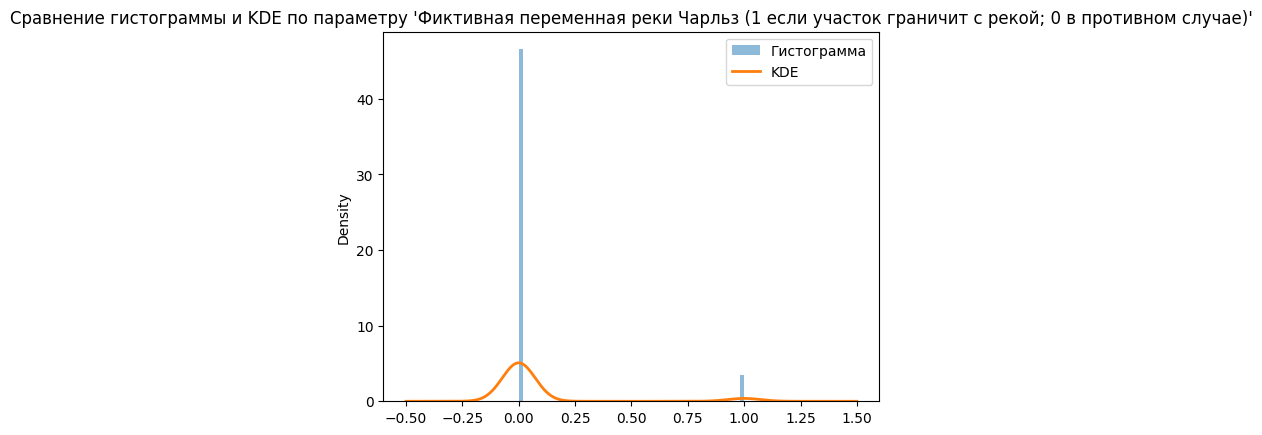

Концентрация оксидов азота (частей на 10 миллионов)


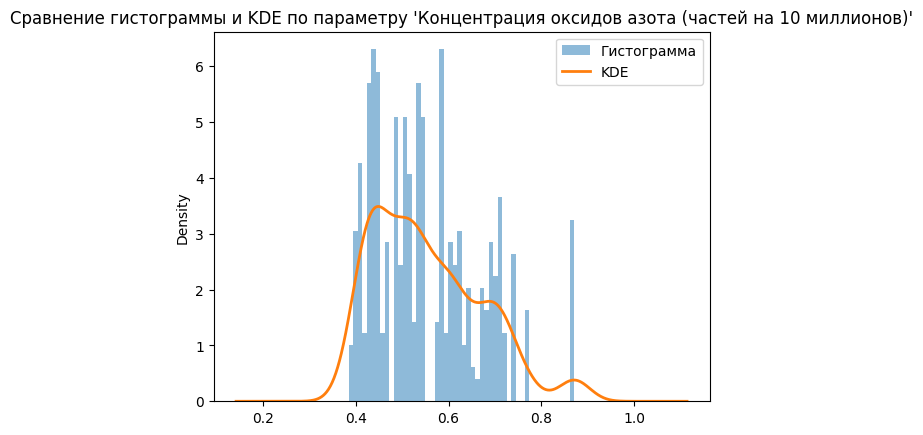

Среднее количество комнат в жилище


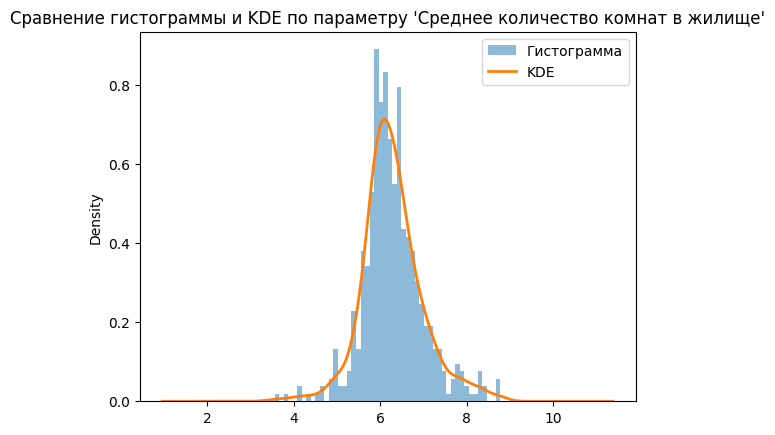

Доля домов, занятых владельцами, построенных до 1940 года


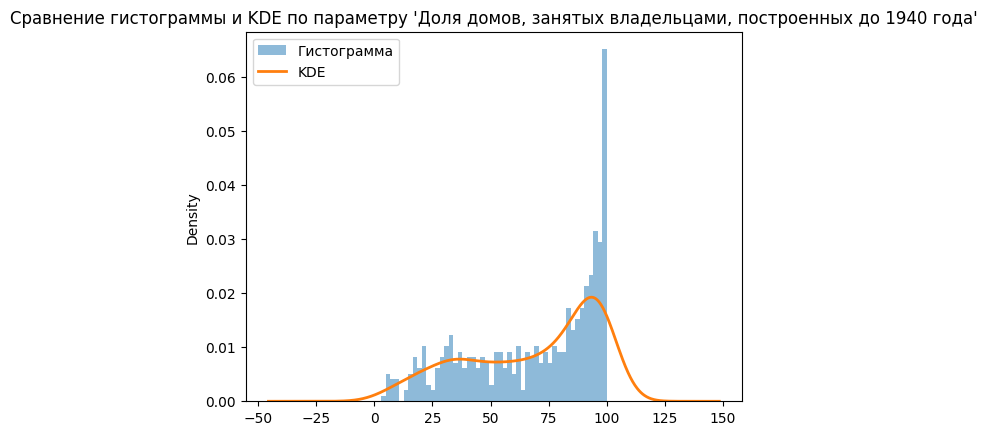

Взвешенные расстояния до пяти бостонских центров занятости


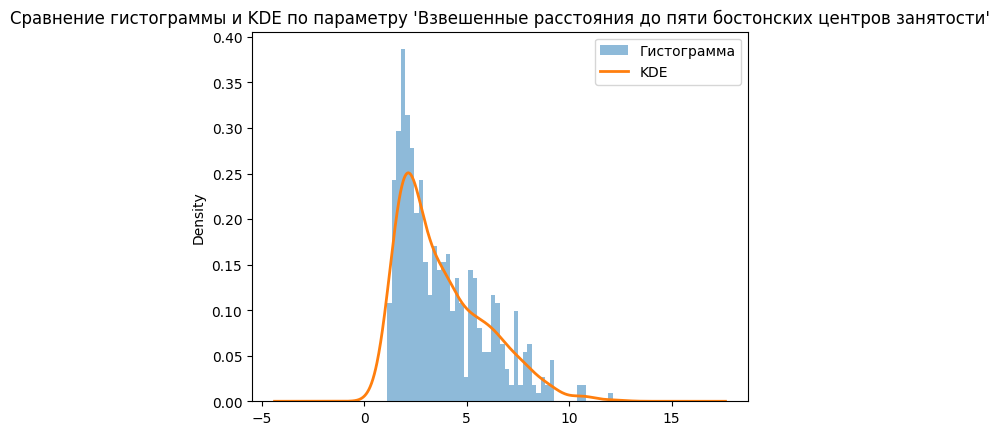

Индекс доступности к радиальным highways


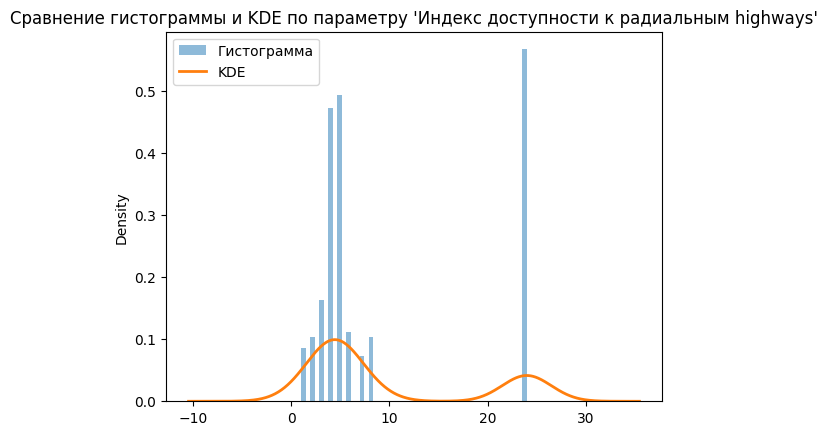

Полная ставка налога на имущество за $10,000


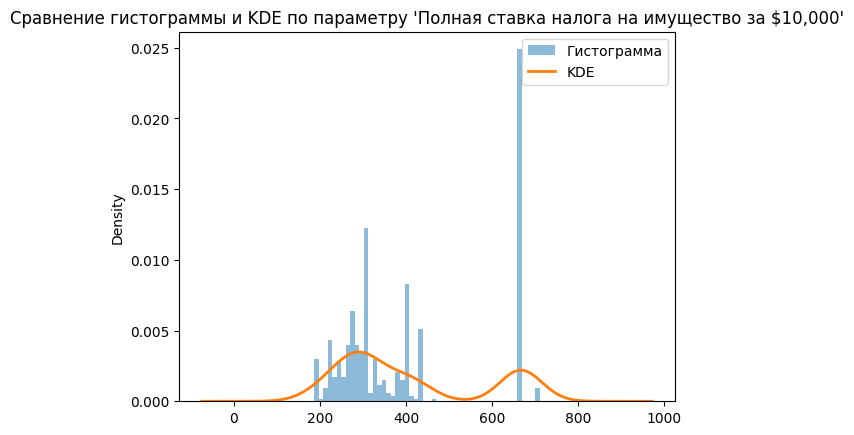

Соотношение учеников и учителей по городам


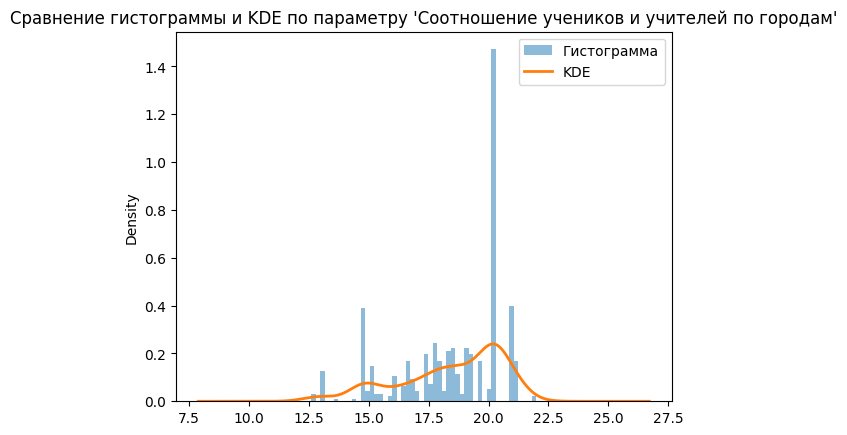

1000(Bk - 0,63)², где Bk - доля чернокожего населения по городам


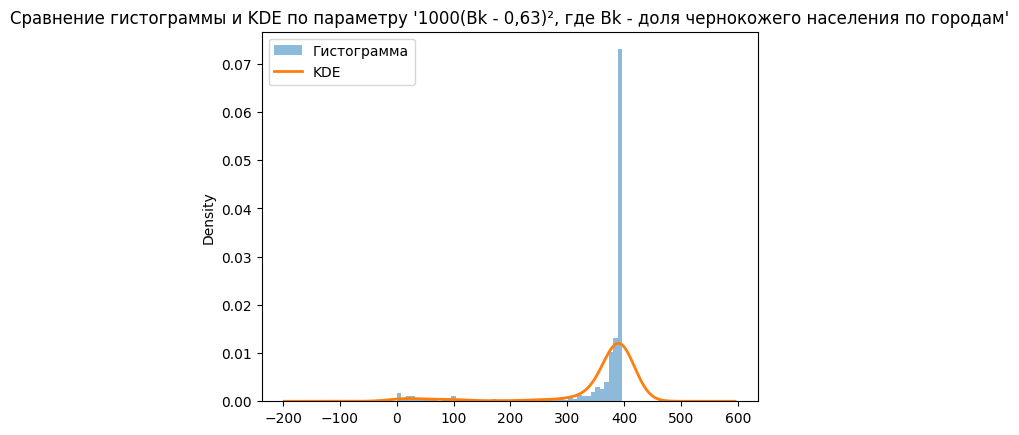

процент населения с низким социально-экономическим статусом


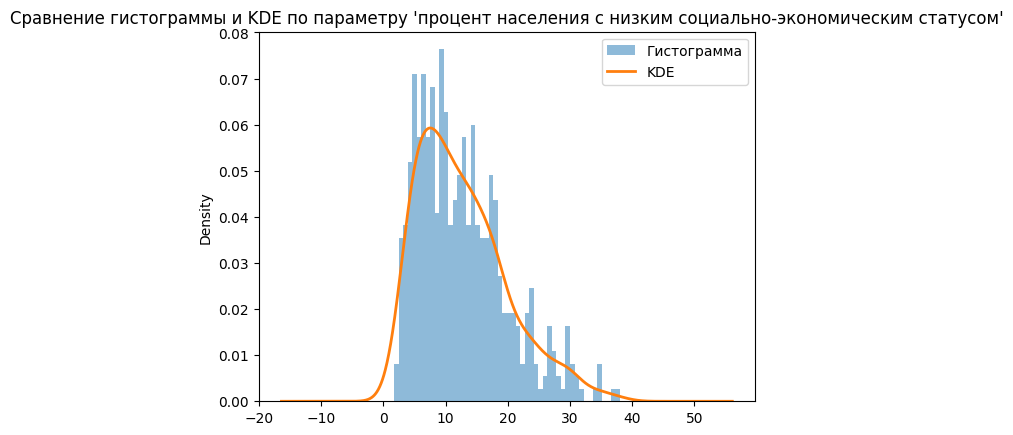

Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000)


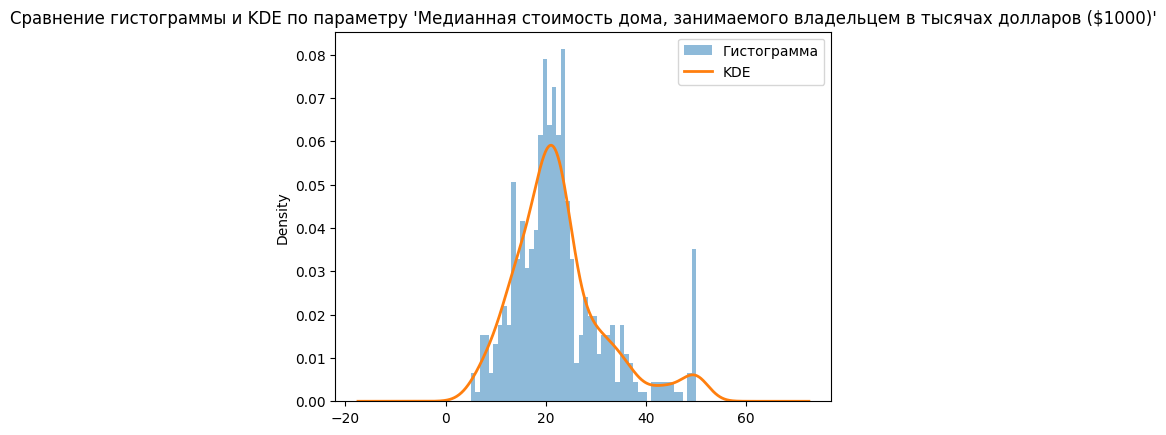

In [60]:
for row in data:
    print(row)
    data[row].plot.hist(bins=50,density=True, alpha=0.5, title=F"{row}", label='Гистограмма')
    data[row].plot.kde(title=F"{row}",linewidth=2, label='KDE')
    plt.title(F"Сравнение гистограммы и KDE по параметру '{row}'")
    plt.legend()
    plt.show()

Корреляция Пирсона — это статистическая мера, которая показывает линейную зависимость между двумя числовыми переменными.

Что показывает корреляция Пирсона:1. Сила и направление связи:
Значение от -1 до +1

+1 — идеальная прямая линейная зависимость

-1 — идеальная обратная линейная зависимость

0 — отсутствие линейной зависимости

2. Интерпретация значений:
±0.9 - ±1.0 — очень сильная корреляция

±0.7 - ±0.9 — сильная корреляция

±0.5 - ±0.7 — умеренная корреляция

±0.3 - ±0.5 — слабая корреляция

±0.0 - ±0.3 — очень слабая или отсутствует

In [82]:
def analyze_dependence(df, col1, col2, figsize=(12, 8)):
    """
    Анализирует зависимость между двумя числовыми столбцами с полными русскими названиями
    """
    corr = df[col1].corr(df[col2])
    print(f"\n\nКорреляция Пирсона: {corr:.3f} для: \n{col1} \n {col2}")
    if corr < 0.5:
        print("Слабая корреляция, не показывает причинно-следственную связь")
    else:
        # Создаем график с увеличенным размером
        plt.figure(figsize=figsize)
        plt.scatter(df[col1], df[col2], alpha=0.6, s=50)
        
        # Используем полные названия
        plt.xlabel(col1, fontsize=12)
        plt.ylabel(col2, fontsize=12)
        
        # Создаем заголовок с переносами строк
        title = f'Зависимость:\n{col1}\nvs\n{col2}\n(r={corr:.3f})'
        plt.title(title, fontsize=14, pad=20)
        
        plt.grid(True, alpha=0.3)
        plt.tight_layout()  # Автоматическая регулировка
        plt.show()
        
    return corr



Корреляция Пирсона: -0.388 для: 
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) 
 Уровень преступности на душу населения по городам
Слабая корреляция, не показывает причинно-следственную связь


Корреляция Пирсона: 0.360 для: 
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) 
 Доля жилой земли, отведенной под участки площадью более 25 000 кв. футов
Слабая корреляция, не показывает причинно-следственную связь


Корреляция Пирсона: -0.484 для: 
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) 
 Доля акров нерозничного бизнеса по городам
Слабая корреляция, не показывает причинно-следственную связь


Корреляция Пирсона: 0.175 для: 
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) 
 Фиктивная переменная реки Чарльз (1 если участок граничит с рекой; 0 в противном случае)
Слабая корреляция, не показывает причинно-следственную связь


Корреляция Пирсона: -0.427 для: 
Медианная стоимо

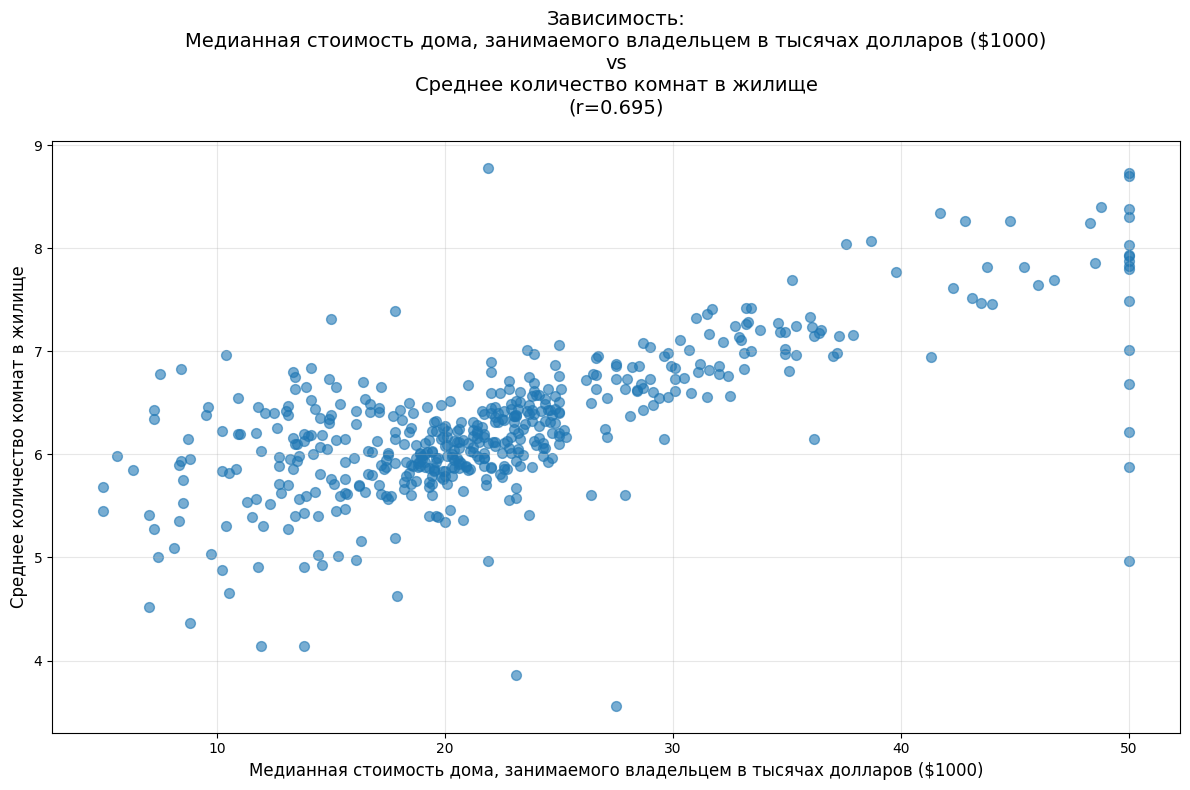



Корреляция Пирсона: -0.377 для: 
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) 
 Доля домов, занятых владельцами, построенных до 1940 года
Слабая корреляция, не показывает причинно-следственную связь


Корреляция Пирсона: 0.250 для: 
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) 
 Взвешенные расстояния до пяти бостонских центров занятости
Слабая корреляция, не показывает причинно-следственную связь


Корреляция Пирсона: -0.382 для: 
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) 
 Индекс доступности к радиальным highways
Слабая корреляция, не показывает причинно-следственную связь


Корреляция Пирсона: -0.469 для: 
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) 
 Полная ставка налога на имущество за $10,000
Слабая корреляция, не показывает причинно-следственную связь


Корреляция Пирсона: -0.508 для: 
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов

In [83]:
col1 = "Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000)"
importlib.reload(plt)
for col in data.columns[:-1]:
    col2 = col
    analyze_dependence(data,col1=col1,col2=col2)

Общее назначение
Функция выполняет комплексный анализ зависимости между двумя переменными в DataFrame, предоставляя полную статистическую и визуальную оценку их взаимосвязи.

🎯 Что входит в анализ:
1. Статистический анализ
Корреляция Пирсона - линейная зависимость

Корреляция Спирмена - нелинейная зависимость

Ковариация - совместная изменчивость

Описательная статистика - среднее, стандартное отклонение

2. Визуальный анализ (4 графика)
Scatter plot с линией регрессии - точечная диаграмма

KDE распределения - ядерная оценка плотности

Boxplot - сравнение распределений

Hexbin/Scatter - плотность точек данных

3. Анализ качества данных
Выбросы - определение аномальных значений

Процент выбросов - доля аномалий в данных

Пропущенные значения - анализ completeness данных

4. Интерпретация результатов
Сила зависимости - очень сильная/сильная/умеренная/слабая

Направление - прямая/обратная зависимость

Характер - линейный/нелинейный

Практическая значимость - оценка полезности зависимости

5. Рекомендации
Для моделирования - использовать ли в ML моделях

Для дальнейшего анализа - что исследовать дальше

Предупреждения - о возможных проблемах с данными

Анализ зависимости: Уровень преступности на душу населения по городам vs Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000)
📊 Базовые статистики:
Корреляция Пирсона: -0.388
Корреляция Спирмена: -0.559
Ковариация: -30.719

📈 Описательная статистика:
Уровень преступности на душу населения по городам: mean=3.61, std=8.60
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000): mean=22.53, std=9.20


C:\Temp\ipykernel_59576\428560429.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])


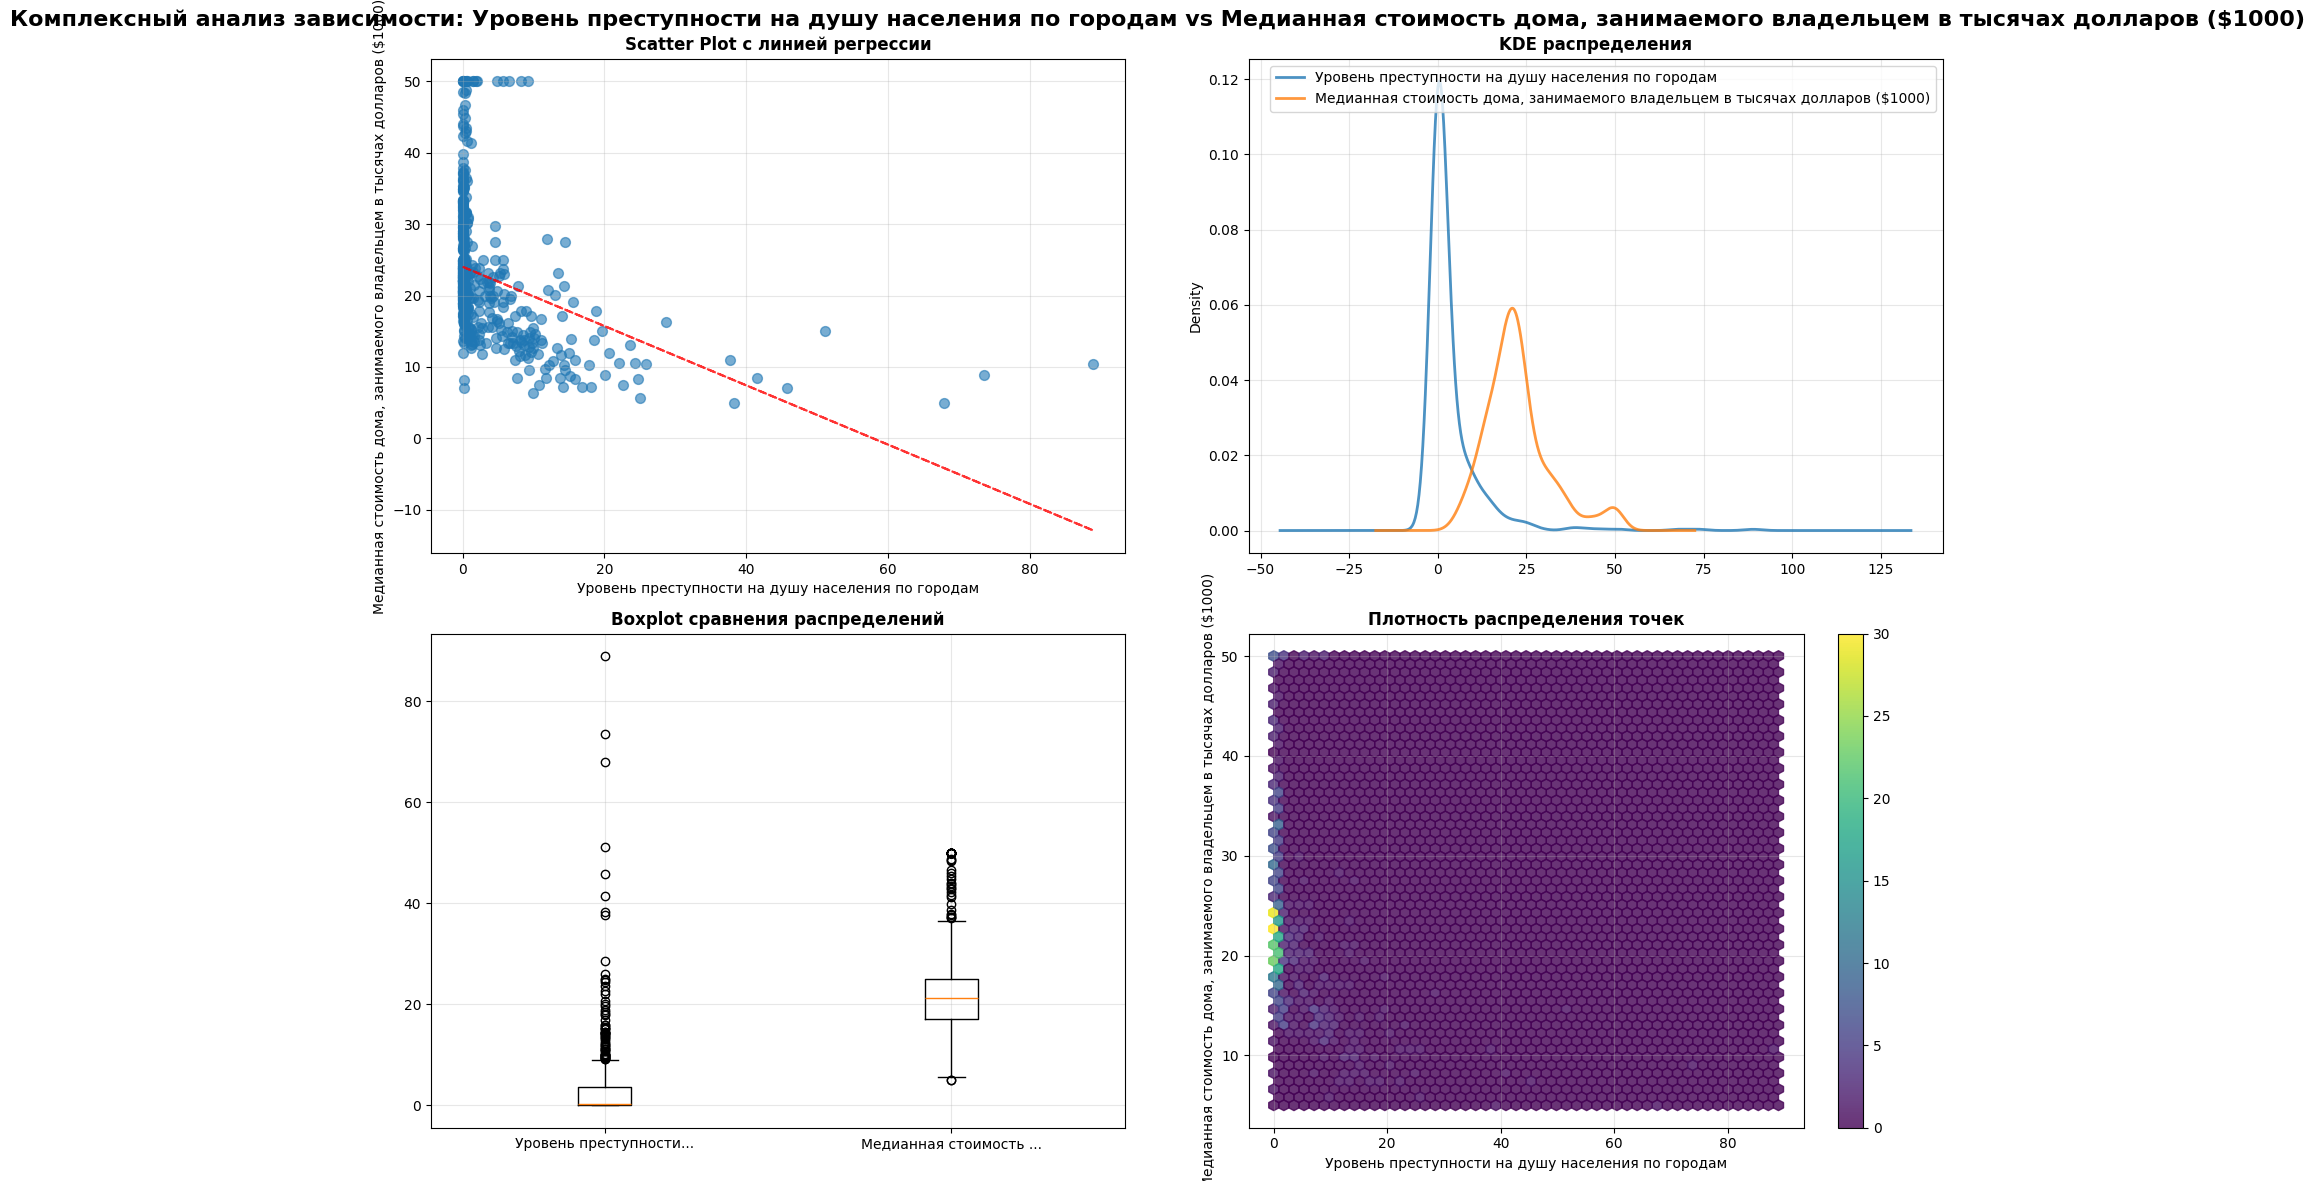


🔍 Дополнительный анализ:
Выбросы в Уровень преступ...: 66 (13.0%)
Выбросы в Медианная стоим...: 40 (7.9%)

🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:
📈 СИЛА ЗАВИСИМОСТИ: УМЕРЕННАЯ
📊 НАПРАВЛЕНИЕ: ОБРАТНАЯ
🔷 ХАРАКТЕР: СМЕШАННЫЙ
📝 ИНТЕРПРЕТАЦИЯ: увеличение одного показателя сопровождается уменьшением другого

📋 ДЕТАЛИ:
• Коэффициент корреляции Пирсона: -0.388
• Коэффициент корреляции Спирмена: -0.559
• Зависимость умеренная, требует дополнительного анализа

💡 РЕКОМЕНДАЦИИ:
• Слабая зависимость, может потребовать конструирования признаков
• Рассмотрите нелинейные преобразования

⚠️  ВНИМАНИЕ: Обнаружено много выбросов (>10%)
• Результаты могут быть искажены
• Рекомендуется анализ без выбросов


In [109]:
def comprehensive_dependency_analysis(df, col1, col2):
    """
    Комплексный анализ зависимости между двумя столбцами
    """
    print(f"Анализ зависимости: {col1} vs {col2}")
    print("=" * 60)
    
    # Базовые статистики
    print("📊 Базовые статистики:")
    pearson_corr = df[col1].corr(df[col2])
    spearman_corr = df[col1].corr(df[col2], method='spearman')
    print(f"Корреляция Пирсона: {pearson_corr:.3f}")
    print(f"Корреляция Спирмена: {spearman_corr:.3f}")
    print(f"Ковариация: {df[col1].cov(df[col2]):.3f}")
    
    # Дополнительная статистика
    print("\n📈 Описательная статистика:")
    print(f"{col1}: mean={df[col1].mean():.2f}, std={df[col1].std():.2f}")
    print(f"{col2}: mean={df[col2].mean():.2f}, std={df[col2].std():.2f}")
    
    # Визуализация
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Scatter plot с линией регрессии
    axes[0,0].scatter(df[col1], df[col2], alpha=0.6, s=50)
    z = np.polyfit(df[col1], df[col2], 1)
    p = np.poly1d(z)
    axes[0,0].plot(df[col1], p(df[col1]), "r--", alpha=0.8)
    axes[0,0].set_xlabel(col1, fontsize=10)
    axes[0,0].set_ylabel(col2, fontsize=10)
    axes[0,0].set_title('Scatter Plot с линией регрессии', fontweight='bold')
    axes[0,0].grid(alpha=0.3)
    
    # 2. KDE распределения
    df[col1].plot.kde(ax=axes[0,1], label=col1, linewidth=2, alpha=0.8)
    df[col2].plot.kde(ax=axes[0,1], label=col2, linewidth=2, alpha=0.8)
    axes[0,1].set_title('KDE распределения', fontweight='bold')
    axes[0,1].legend()
    axes[0,1].grid(alpha=0.3)
    
    # 3. Boxplot
    boxplot_data = [df[col1].dropna(), df[col2].dropna()]
    axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])
    axes[1,0].set_title('Boxplot сравнения распределений', fontweight='bold')
    axes[1,0].grid(alpha=0.3)
    
    # 4. Hexbin или scatter
    if len(df) > 100:
        hb = axes[1,1].hexbin(df[col1], df[col2], gridsize=50, cmap='viridis', alpha=0.8)
        plt.colorbar(hb, ax=axes[1,1])
    else:
        axes[1,1].scatter(df[col1], df[col2], alpha=0.8, s=80)
    axes[1,1].set_xlabel(col1, fontsize=10)
    axes[1,1].set_ylabel(col2, fontsize=10)
    axes[1,1].set_title('Плотность распределения точек', fontweight='bold')
    axes[1,1].grid(alpha=0.3)
    
    plt.suptitle(f'Комплексный анализ зависимости: {col1} vs {col2}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Дополнительный анализ
    print("\n🔍 Дополнительный анализ:")
    Q1_1, Q3_1 = df[col1].quantile(0.25), df[col1].quantile(0.75)
    IQR_1 = Q3_1 - Q1_1
    outliers_1 = ((df[col1] < (Q1_1 - 1.5 * IQR_1)) | (df[col1] > (Q3_1 + 1.5 * IQR_1))).sum()
    
    Q1_2, Q3_2 = df[col2].quantile(0.25), df[col2].quantile(0.75)
    IQR_2 = Q3_2 - Q1_2
    outliers_2 = ((df[col2] < (Q1_2 - 1.5 * IQR_2)) | (df[col2] > (Q3_2 + 1.5 * IQR_2))).sum()
    
    print(f"Выбросы в {col1[:15]}...: {outliers_1} ({outliers_1/len(df)*100:.1f}%)")
    print(f"Выбросы в {col2[:15]}...: {outliers_2} ({outliers_2/len(df)*100:.1f}%)")
    
    # ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ
    print("\n" + "=" * 60)
    print("🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:")
    print("=" * 60)
    
    # Анализ силы корреляции
    abs_pearson = abs(pearson_corr)
    if abs_pearson >= 0.7:
        strength = "ОЧЕНЬ СИЛЬНАЯ"
    elif abs_pearson >= 0.5:
        strength = "СИЛЬНАЯ" 
    elif abs_pearson >= 0.3:
        strength = "УМЕРЕННАЯ"
    elif abs_pearson >= 0.1:
        strength = "СЛАБАЯ"
    else:
        strength = "ОЧЕНЬ СЛАБАЯ или ОТСУТСТВУЕТ"
    
    # Анализ направления
    if pearson_corr > 0:
        direction = "ПРЯМАЯ" 
        interpretation = "увеличение одного показателя сопровождается увеличением другого"
    elif pearson_corr < 0:
        direction = "ОБРАТНАЯ"
        interpretation = "увеличение одного показателя сопровождается уменьшением другого"
    else:
        direction = "ОТСУТСТВУЕТ"
        interpretation = "зависимость не обнаружена"
    
    # Анализ согласованности метрик
    pearson_abs = abs(pearson_corr)
    spearman_abs = abs(spearman_corr)
    difference = abs(pearson_abs - spearman_abs)
    
    if difference > 0.2:
        linearity = "НЕЛИНЕЙНЫЙ"
    elif difference > 0.1:
        linearity = "СМЕШАННЫЙ"
    else:
        linearity = "ЛИНЕЙНЫЙ"
    
    print(f"📈 СИЛА ЗАВИСИМОСТИ: {strength}")
    print(f"📊 НАПРАВЛЕНИЕ: {direction}")
    print(f"🔷 ХАРАКТЕР: {linearity}")
    print(f"📝 ИНТЕРПРЕТАЦИЯ: {interpretation}")
    
    # Детализированная интерпретация
    print(f"\n📋 ДЕТАЛИ:")
    print(f"• Коэффициент корреляции Пирсона: {pearson_corr:.3f}")
    print(f"• Коэффициент корреляции Спирмена: {spearman_corr:.3f}")
    
    if abs_pearson > 0.5:
        print("• Зависимость статистически значима и имеет практическую ценность")
    elif abs_pearson > 0.3:
        print("• Зависимость умеренная, требует дополнительного анализа")
    else:
        print("• Зависимость слабая, возможно случайная")
    
    # Рекомендации
    print(f"\n💡 РЕКОМЕНДАЦИИ:")
    if abs_pearson > 0.7:
        print("• Переменные сильно связаны, могут быть полезны для прогнозирования")
        print("• Рассмотрите включение в модель машинного обучения")
    elif abs_pearson > 0.5:
        print("• Зависимость существенная, может быть полезна для анализа")
        print("• Рекомендуется дополнительное исследование")
    elif abs_pearson > 0.3:
        print("• Слабая зависимость, может потребовать конструирования признаков")
        print("• Рассмотрите нелинейные преобразования")
    else:
        print("• Зависимость практически отсутствует")
        print("• Вероятно, переменные независимы")
    
    # Предупреждения
    if outliers_1 > len(df) * 0.1 or outliers_2 > len(df) * 0.1:
        print(f"\n⚠️  ВНИМАНИЕ: Обнаружено много выбросов (>10%)")
        print("• Результаты могут быть искажены")
        print("• Рекомендуется анализ без выбросов")
    
    print("=" * 60)

# Использование
comprehensive_dependency_analysis(
    data,
    "Уровень преступности на душу населения по городам",
    "Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000)"
)

Анализ зависимости: Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) vs Уровень преступности на душу населения по городам
📊 Базовые статистики:
Корреляция Пирсона: -0.388
Корреляция Спирмена: -0.559
Ковариация: -30.719

📈 Описательная статистика:
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000): mean=22.53, std=9.20
Уровень преступности на душу населения по городам: mean=3.61, std=8.60


C:\Temp\ipykernel_59576\428560429.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])


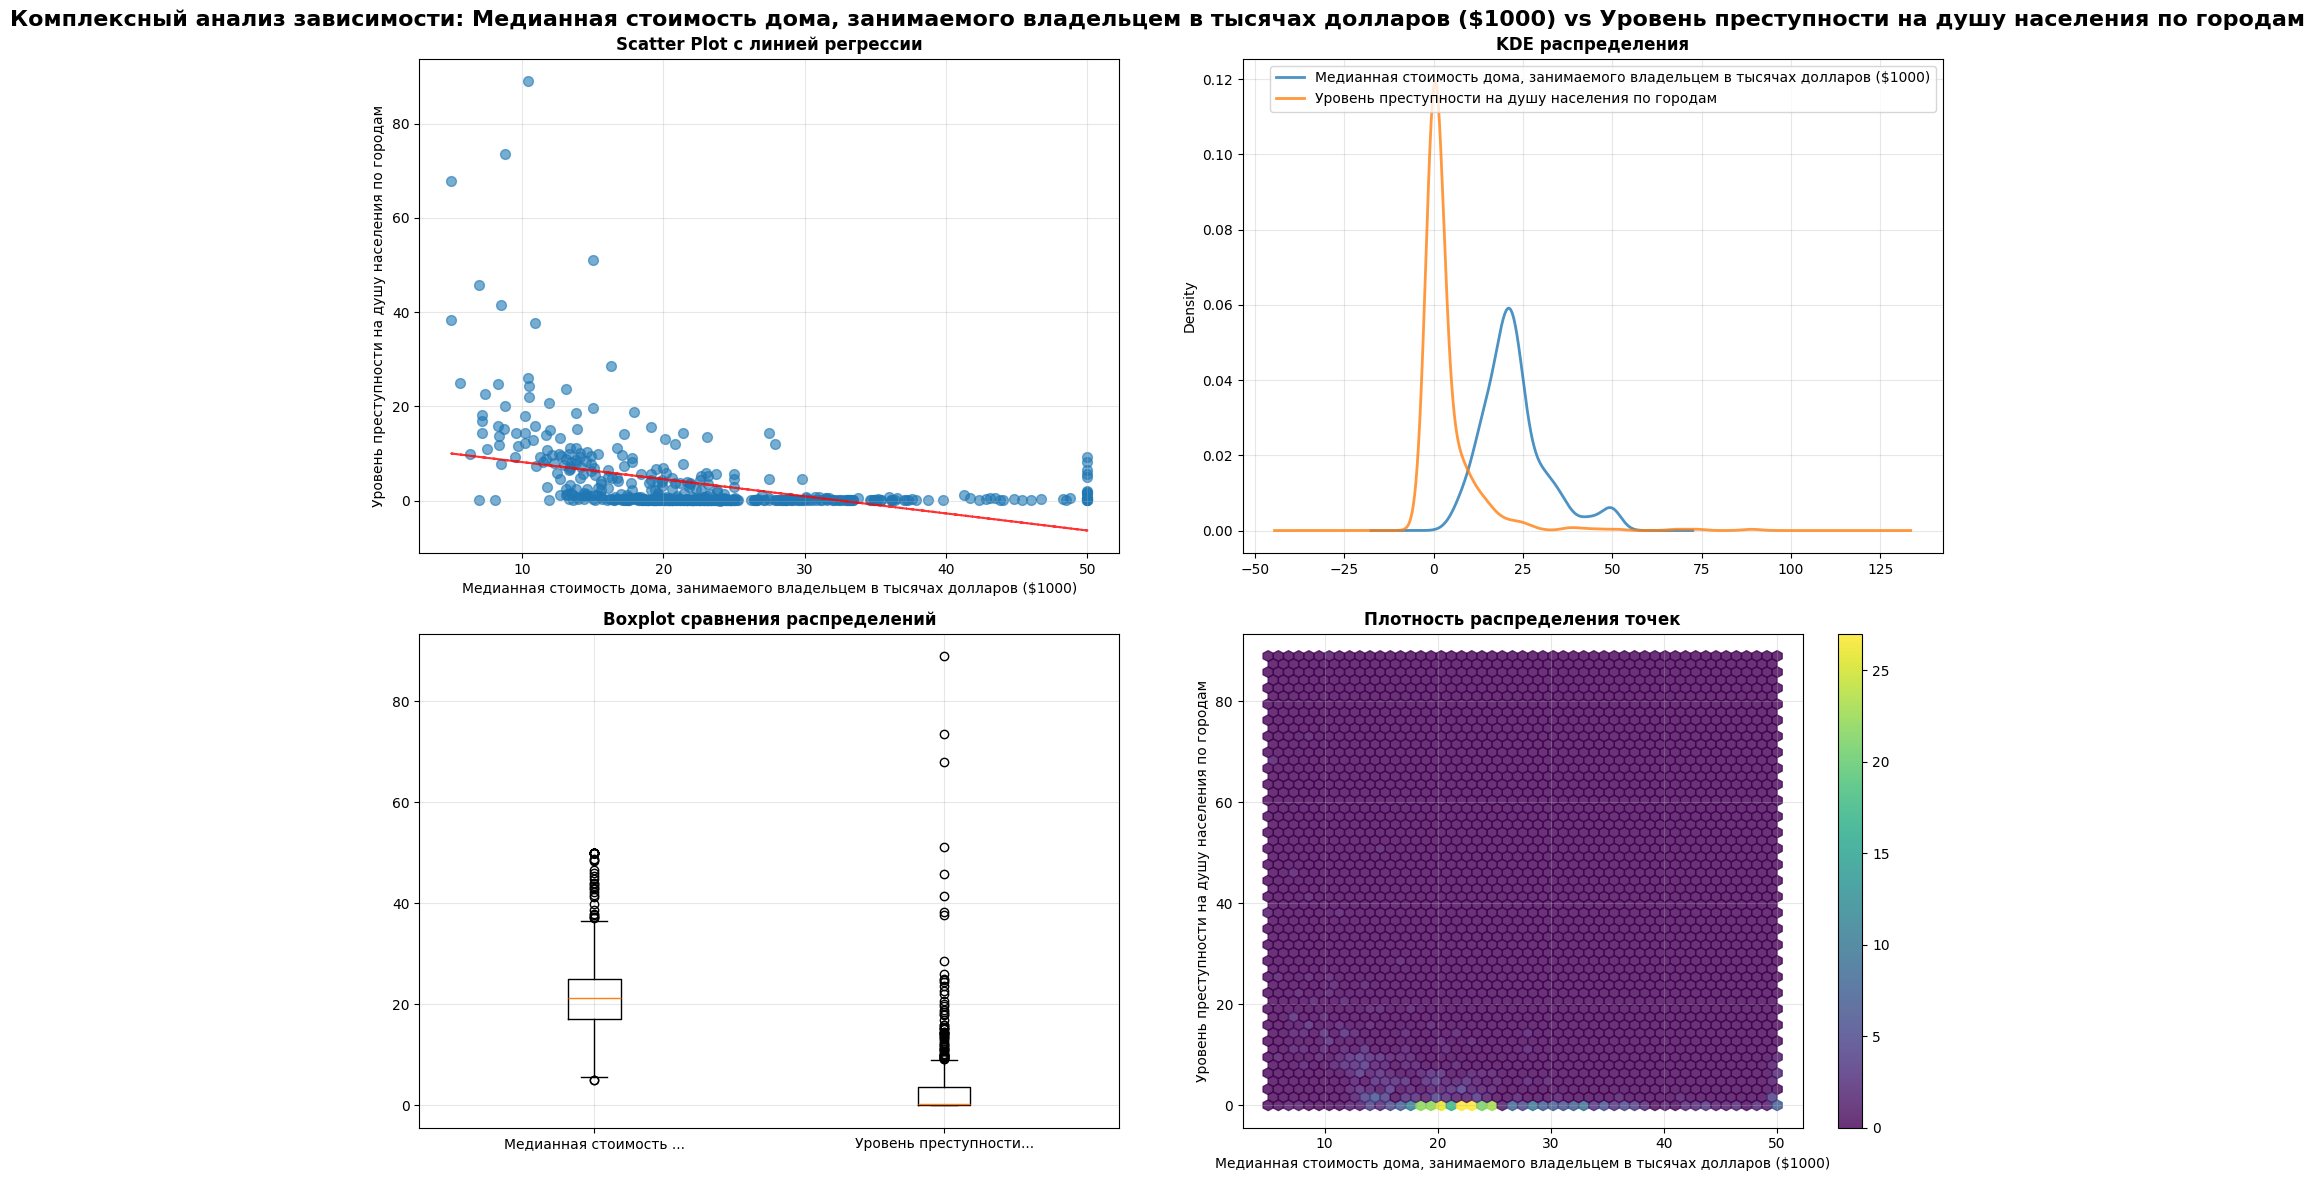


🔍 Дополнительный анализ:
Выбросы в Медианная стоим...: 40 (7.9%)
Выбросы в Уровень преступ...: 66 (13.0%)

🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:
📈 СИЛА ЗАВИСИМОСТИ: УМЕРЕННАЯ
📊 НАПРАВЛЕНИЕ: ОБРАТНАЯ
🔷 ХАРАКТЕР: СМЕШАННЫЙ
📝 ИНТЕРПРЕТАЦИЯ: увеличение одного показателя сопровождается уменьшением другого

📋 ДЕТАЛИ:
• Коэффициент корреляции Пирсона: -0.388
• Коэффициент корреляции Спирмена: -0.559
• Зависимость умеренная, требует дополнительного анализа

💡 РЕКОМЕНДАЦИИ:
• Слабая зависимость, может потребовать конструирования признаков
• Рассмотрите нелинейные преобразования

⚠️  ВНИМАНИЕ: Обнаружено много выбросов (>10%)
• Результаты могут быть искажены
• Рекомендуется анализ без выбросов
Анализ зависимости: Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) vs Доля жилой земли, отведенной под участки площадью более 25 000 кв. футов
📊 Базовые статистики:
Корреляция Пирсона: 0.360
Корреляция Спирмена: 0.438
Ковариация: 77.315

📈 Описательная статистика:
Медианная стоимост

C:\Temp\ipykernel_59576\428560429.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])


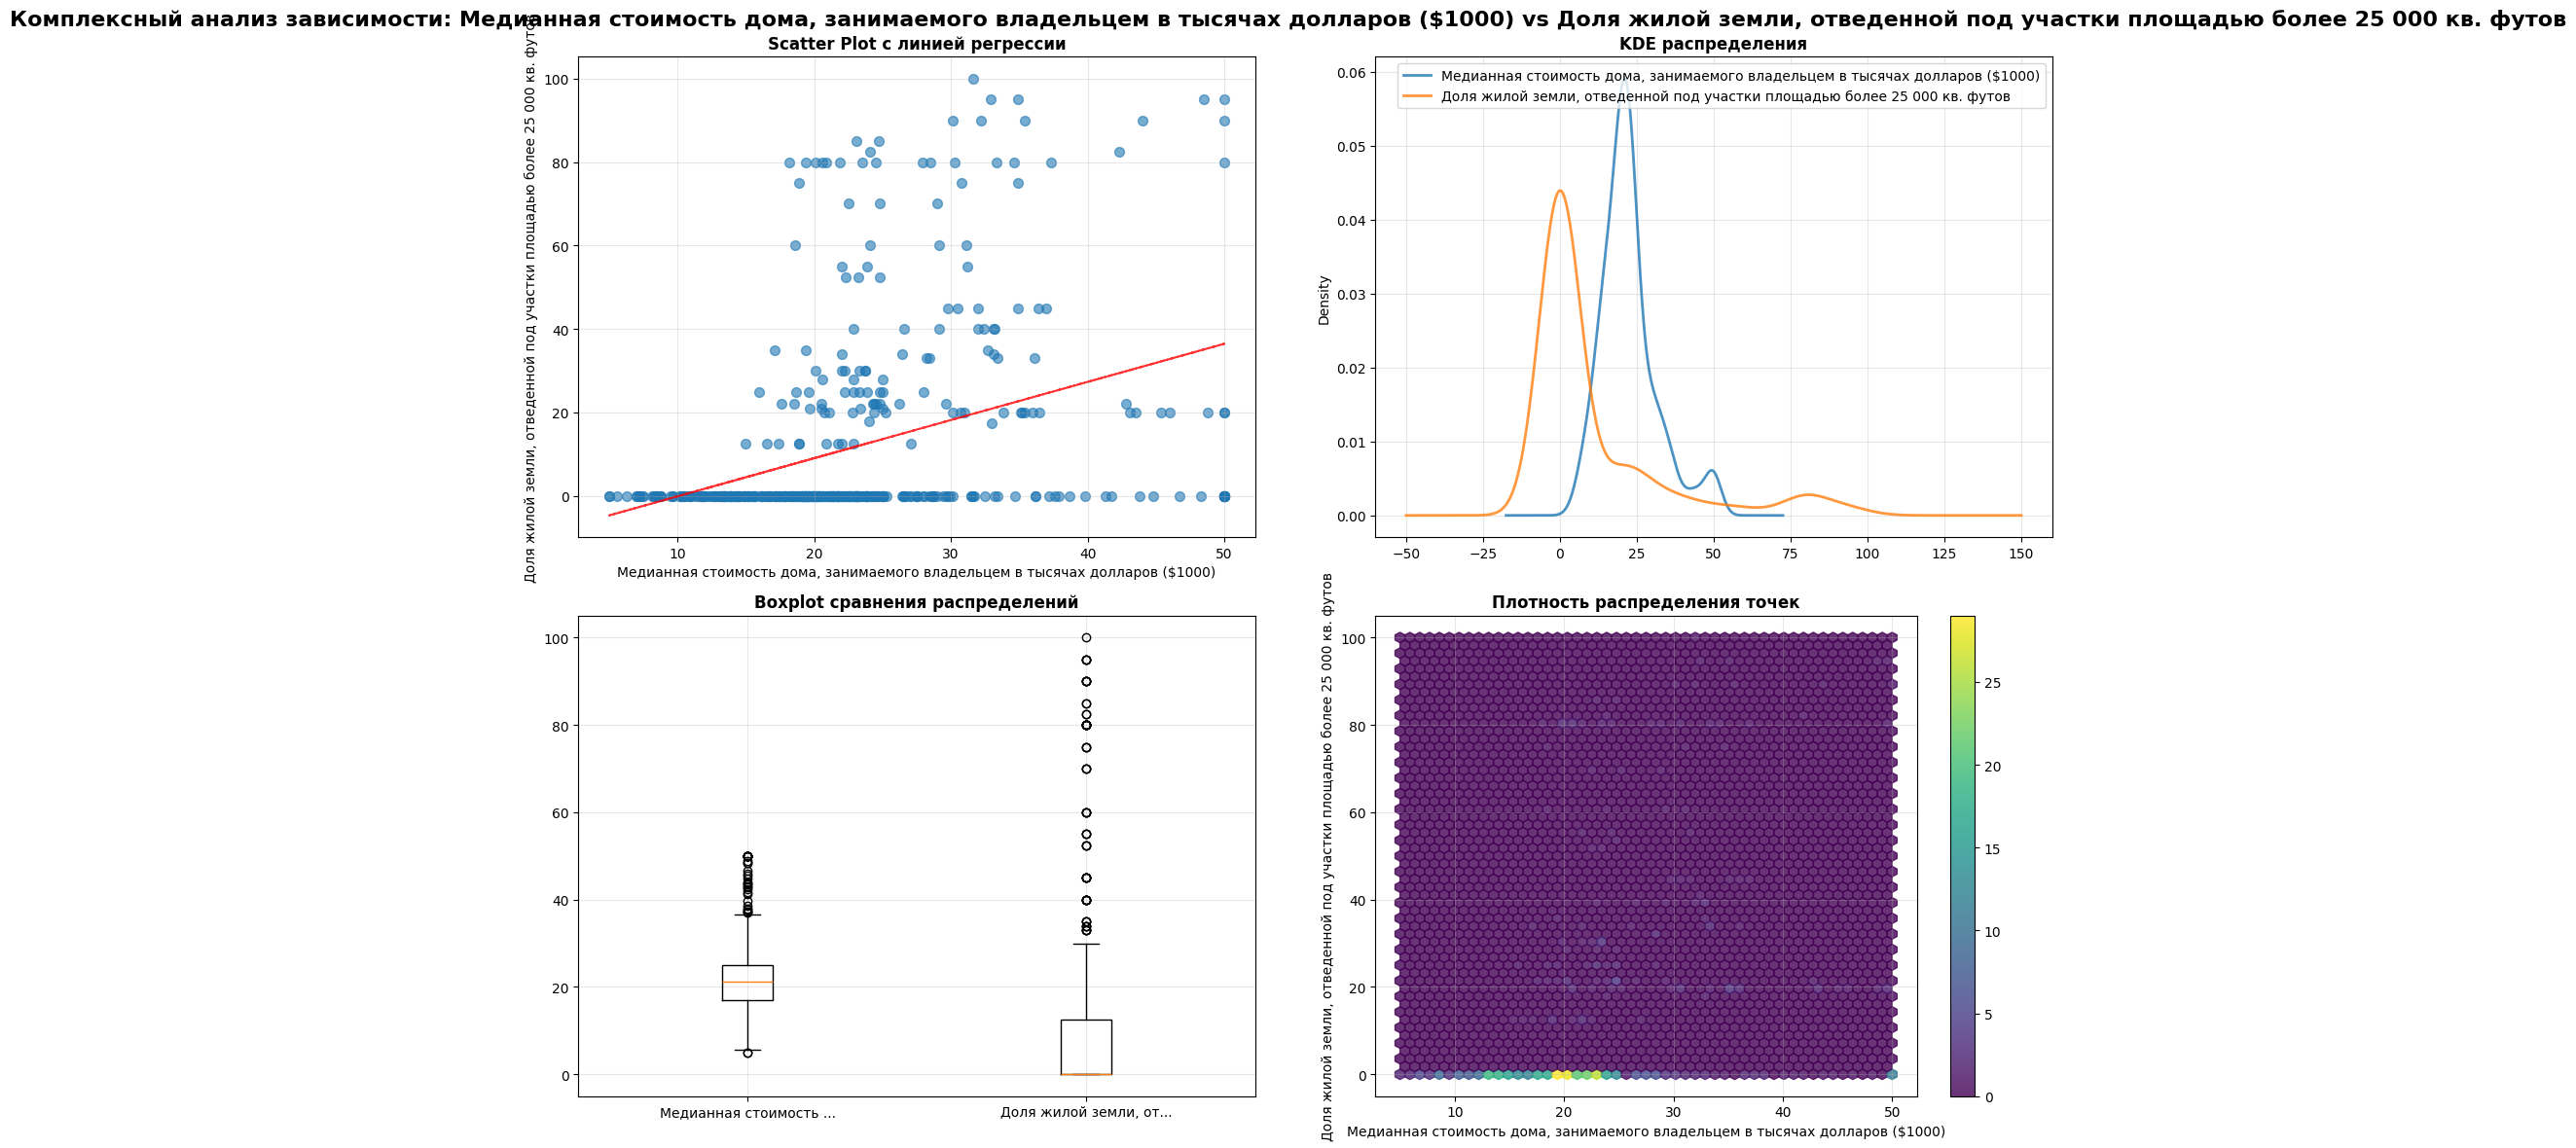


🔍 Дополнительный анализ:
Выбросы в Медианная стоим...: 40 (7.9%)
Выбросы в Доля жилой земл...: 68 (13.4%)

🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:
📈 СИЛА ЗАВИСИМОСТИ: УМЕРЕННАЯ
📊 НАПРАВЛЕНИЕ: ПРЯМАЯ
🔷 ХАРАКТЕР: ЛИНЕЙНЫЙ
📝 ИНТЕРПРЕТАЦИЯ: увеличение одного показателя сопровождается увеличением другого

📋 ДЕТАЛИ:
• Коэффициент корреляции Пирсона: 0.360
• Коэффициент корреляции Спирмена: 0.438
• Зависимость умеренная, требует дополнительного анализа

💡 РЕКОМЕНДАЦИИ:
• Слабая зависимость, может потребовать конструирования признаков
• Рассмотрите нелинейные преобразования

⚠️  ВНИМАНИЕ: Обнаружено много выбросов (>10%)
• Результаты могут быть искажены
• Рекомендуется анализ без выбросов
Анализ зависимости: Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) vs Доля акров нерозничного бизнеса по городам
📊 Базовые статистики:
Корреляция Пирсона: -0.484
Корреляция Спирмена: -0.578
Ковариация: -30.521

📈 Описательная статистика:
Медианная стоимость дома, занимаемого владельцeм в

C:\Temp\ipykernel_59576\428560429.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])


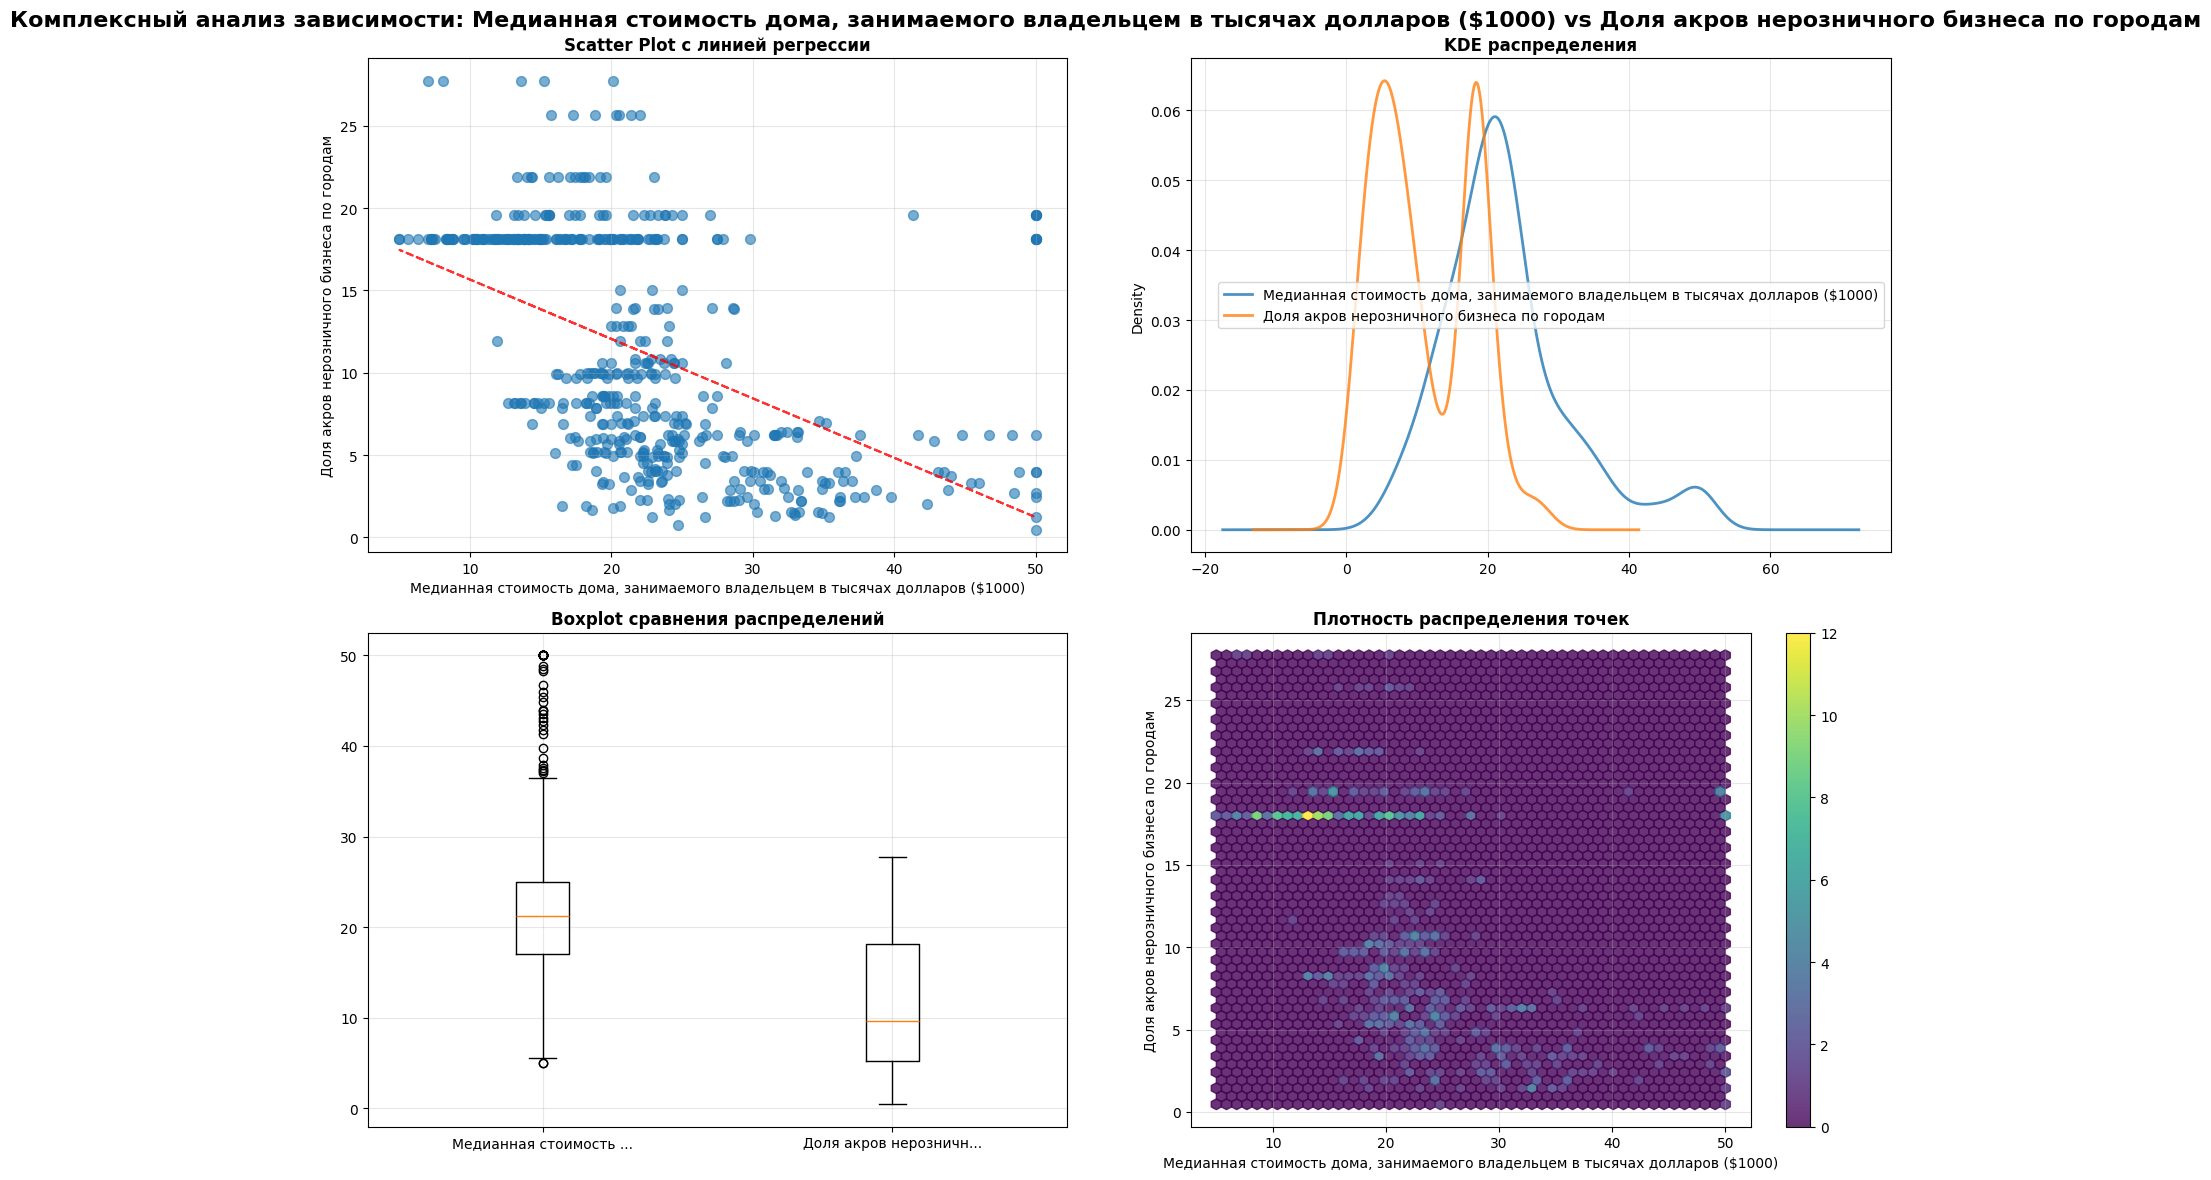


🔍 Дополнительный анализ:
Выбросы в Медианная стоим...: 40 (7.9%)
Выбросы в Доля акров неро...: 0 (0.0%)

🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:
📈 СИЛА ЗАВИСИМОСТИ: УМЕРЕННАЯ
📊 НАПРАВЛЕНИЕ: ОБРАТНАЯ
🔷 ХАРАКТЕР: ЛИНЕЙНЫЙ
📝 ИНТЕРПРЕТАЦИЯ: увеличение одного показателя сопровождается уменьшением другого

📋 ДЕТАЛИ:
• Коэффициент корреляции Пирсона: -0.484
• Коэффициент корреляции Спирмена: -0.578
• Зависимость умеренная, требует дополнительного анализа

💡 РЕКОМЕНДАЦИИ:
• Слабая зависимость, может потребовать конструирования признаков
• Рассмотрите нелинейные преобразования
Анализ зависимости: Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) vs Фиктивная переменная реки Чарльз (1 если участок граничит с рекой; 0 в противном случае)
📊 Базовые статистики:
Корреляция Пирсона: 0.175
Корреляция Спирмена: 0.141
Ковариация: 0.409

📈 Описательная статистика:
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000): mean=22.53, std=9.20
Фиктивная переменная реки

C:\Temp\ipykernel_59576\428560429.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])


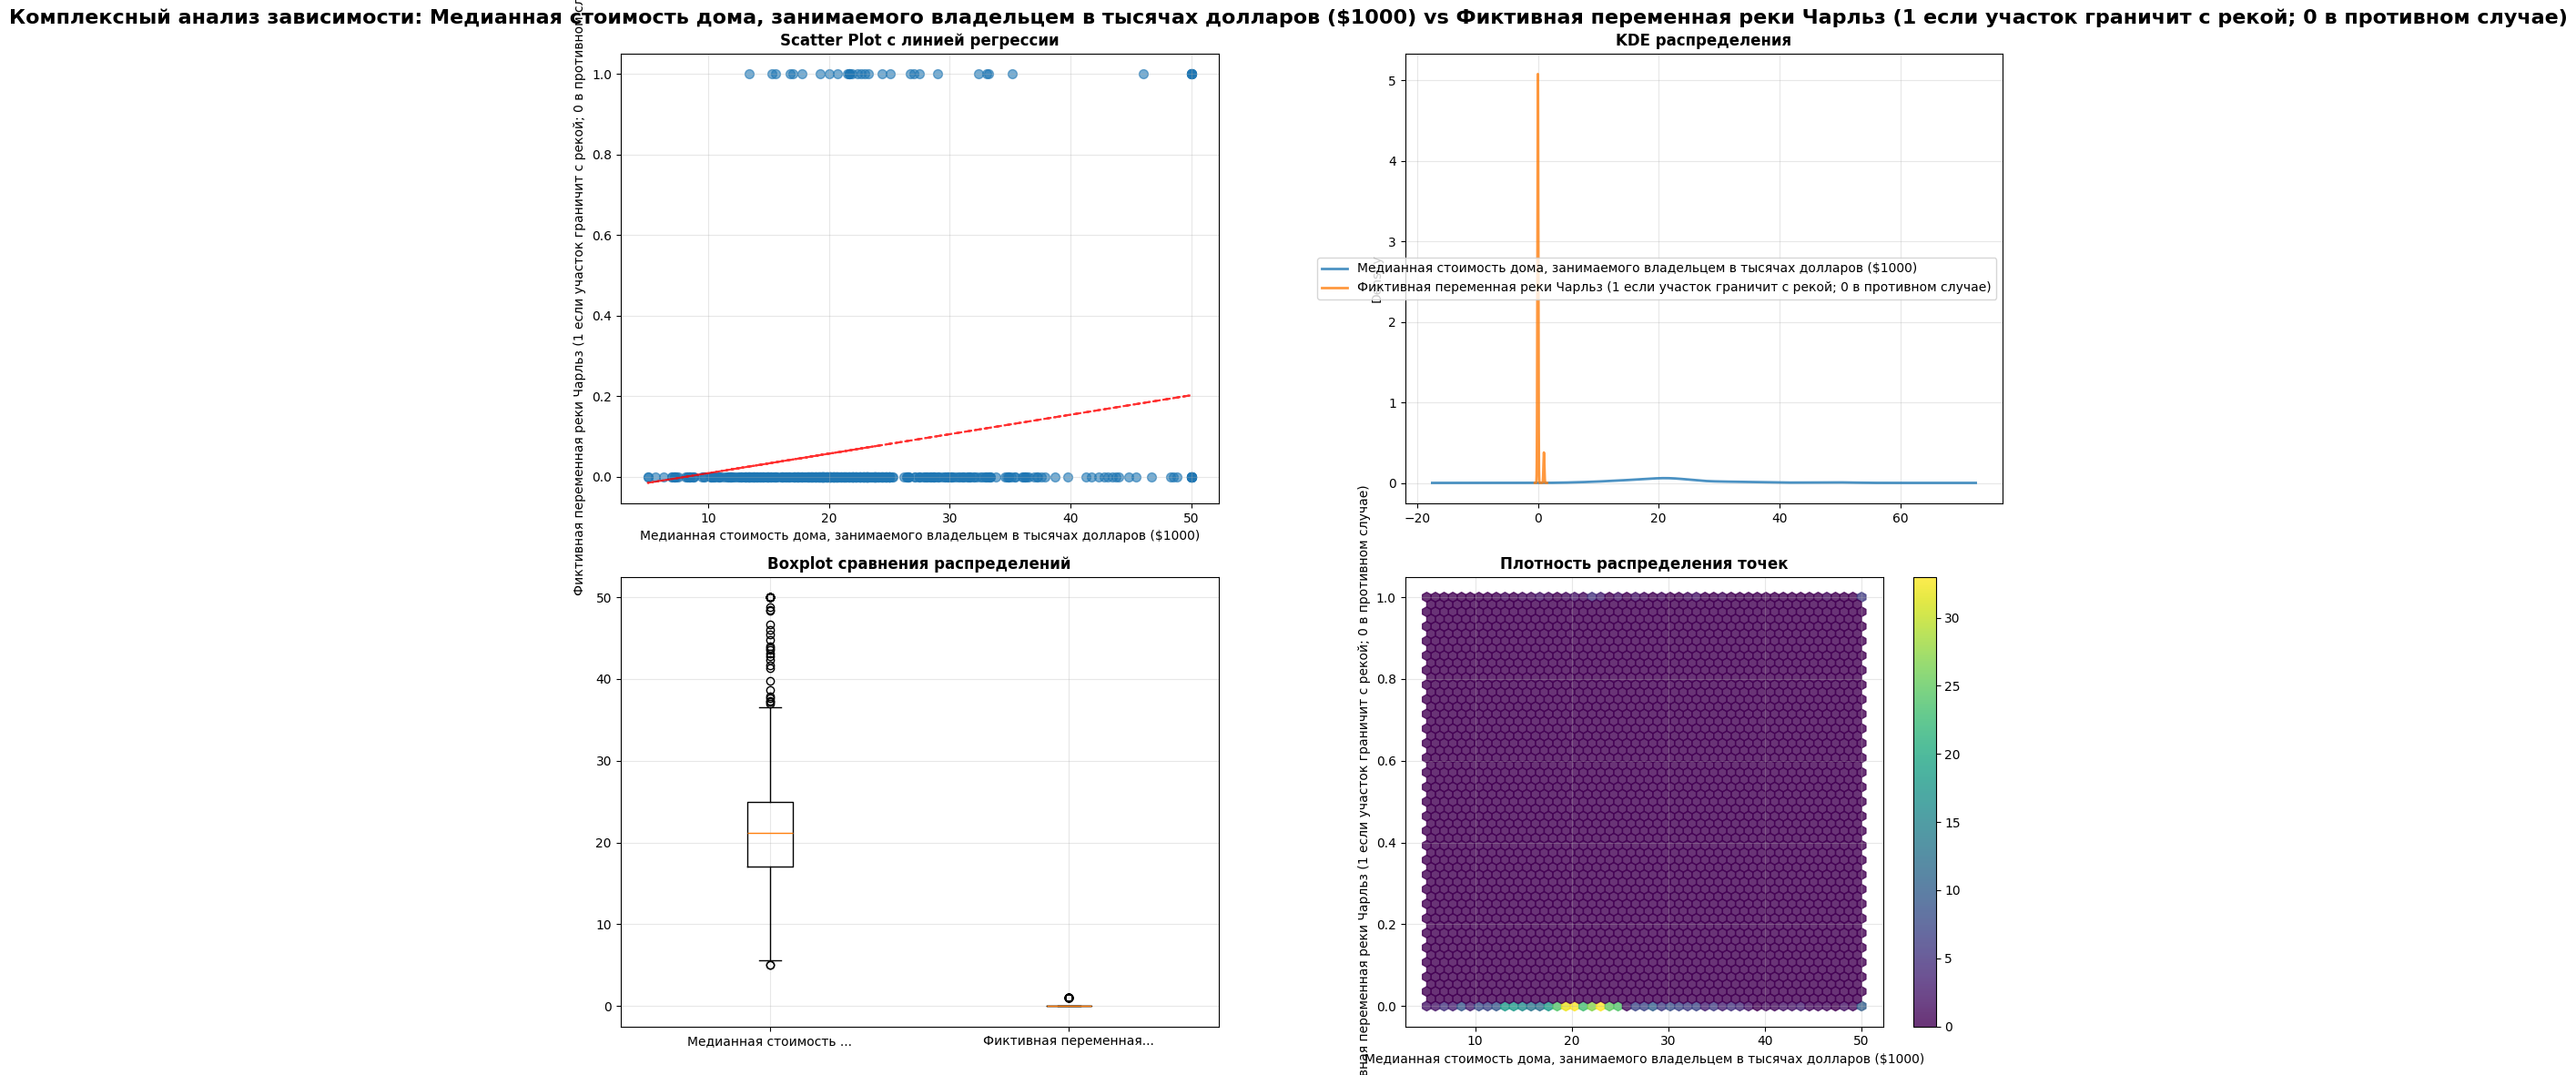


🔍 Дополнительный анализ:
Выбросы в Медианная стоим...: 40 (7.9%)
Выбросы в Фиктивная перем...: 35 (6.9%)

🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:
📈 СИЛА ЗАВИСИМОСТИ: СЛАБАЯ
📊 НАПРАВЛЕНИЕ: ПРЯМАЯ
🔷 ХАРАКТЕР: ЛИНЕЙНЫЙ
📝 ИНТЕРПРЕТАЦИЯ: увеличение одного показателя сопровождается увеличением другого

📋 ДЕТАЛИ:
• Коэффициент корреляции Пирсона: 0.175
• Коэффициент корреляции Спирмена: 0.141
• Зависимость слабая, возможно случайная

💡 РЕКОМЕНДАЦИИ:
• Зависимость практически отсутствует
• Вероятно, переменные независимы
Анализ зависимости: Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) vs Концентрация оксидов азота (частей на 10 миллионов)
📊 Базовые статистики:
Корреляция Пирсона: -0.427
Корреляция Спирмена: -0.563
Ковариация: -0.455

📈 Описательная статистика:
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000): mean=22.53, std=9.20
Концентрация оксидов азота (частей на 10 миллионов): mean=0.55, std=0.12


C:\Temp\ipykernel_59576\428560429.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])


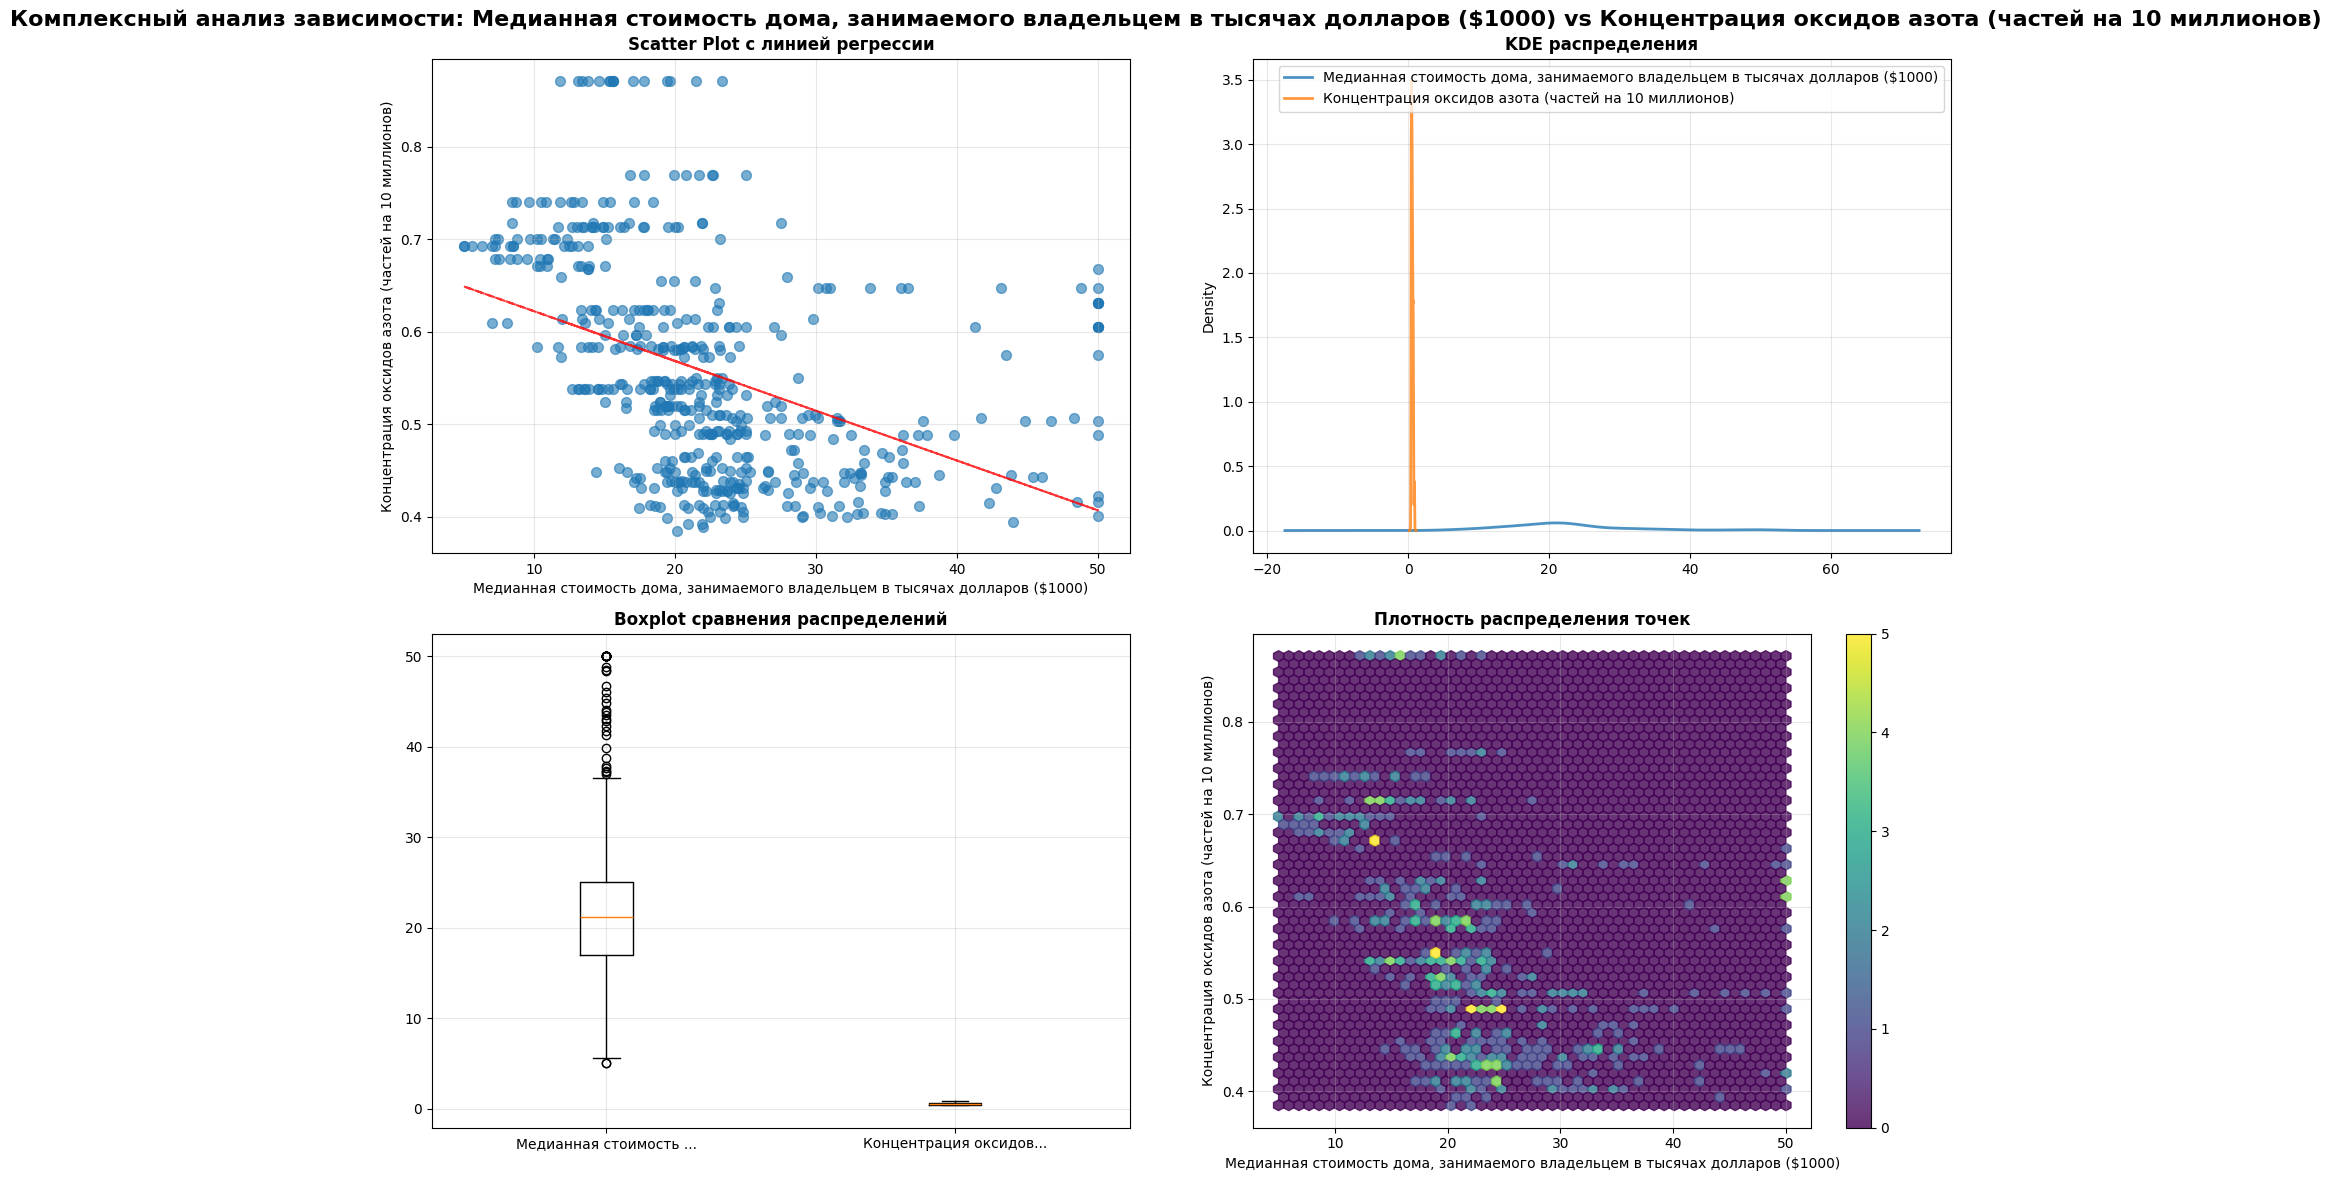


🔍 Дополнительный анализ:
Выбросы в Медианная стоим...: 40 (7.9%)
Выбросы в Концентрация ок...: 0 (0.0%)

🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:
📈 СИЛА ЗАВИСИМОСТИ: УМЕРЕННАЯ
📊 НАПРАВЛЕНИЕ: ОБРАТНАЯ
🔷 ХАРАКТЕР: СМЕШАННЫЙ
📝 ИНТЕРПРЕТАЦИЯ: увеличение одного показателя сопровождается уменьшением другого

📋 ДЕТАЛИ:
• Коэффициент корреляции Пирсона: -0.427
• Коэффициент корреляции Спирмена: -0.563
• Зависимость умеренная, требует дополнительного анализа

💡 РЕКОМЕНДАЦИИ:
• Слабая зависимость, может потребовать конструирования признаков
• Рассмотрите нелинейные преобразования
Анализ зависимости: Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) vs Среднее количество комнат в жилище
📊 Базовые статистики:
Корреляция Пирсона: 0.695
Корреляция Спирмена: 0.634
Ковариация: 4.493

📈 Описательная статистика:
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000): mean=22.53, std=9.20
Среднее количество комнат в жилище: mean=6.28, std=0.70


C:\Temp\ipykernel_59576\428560429.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])


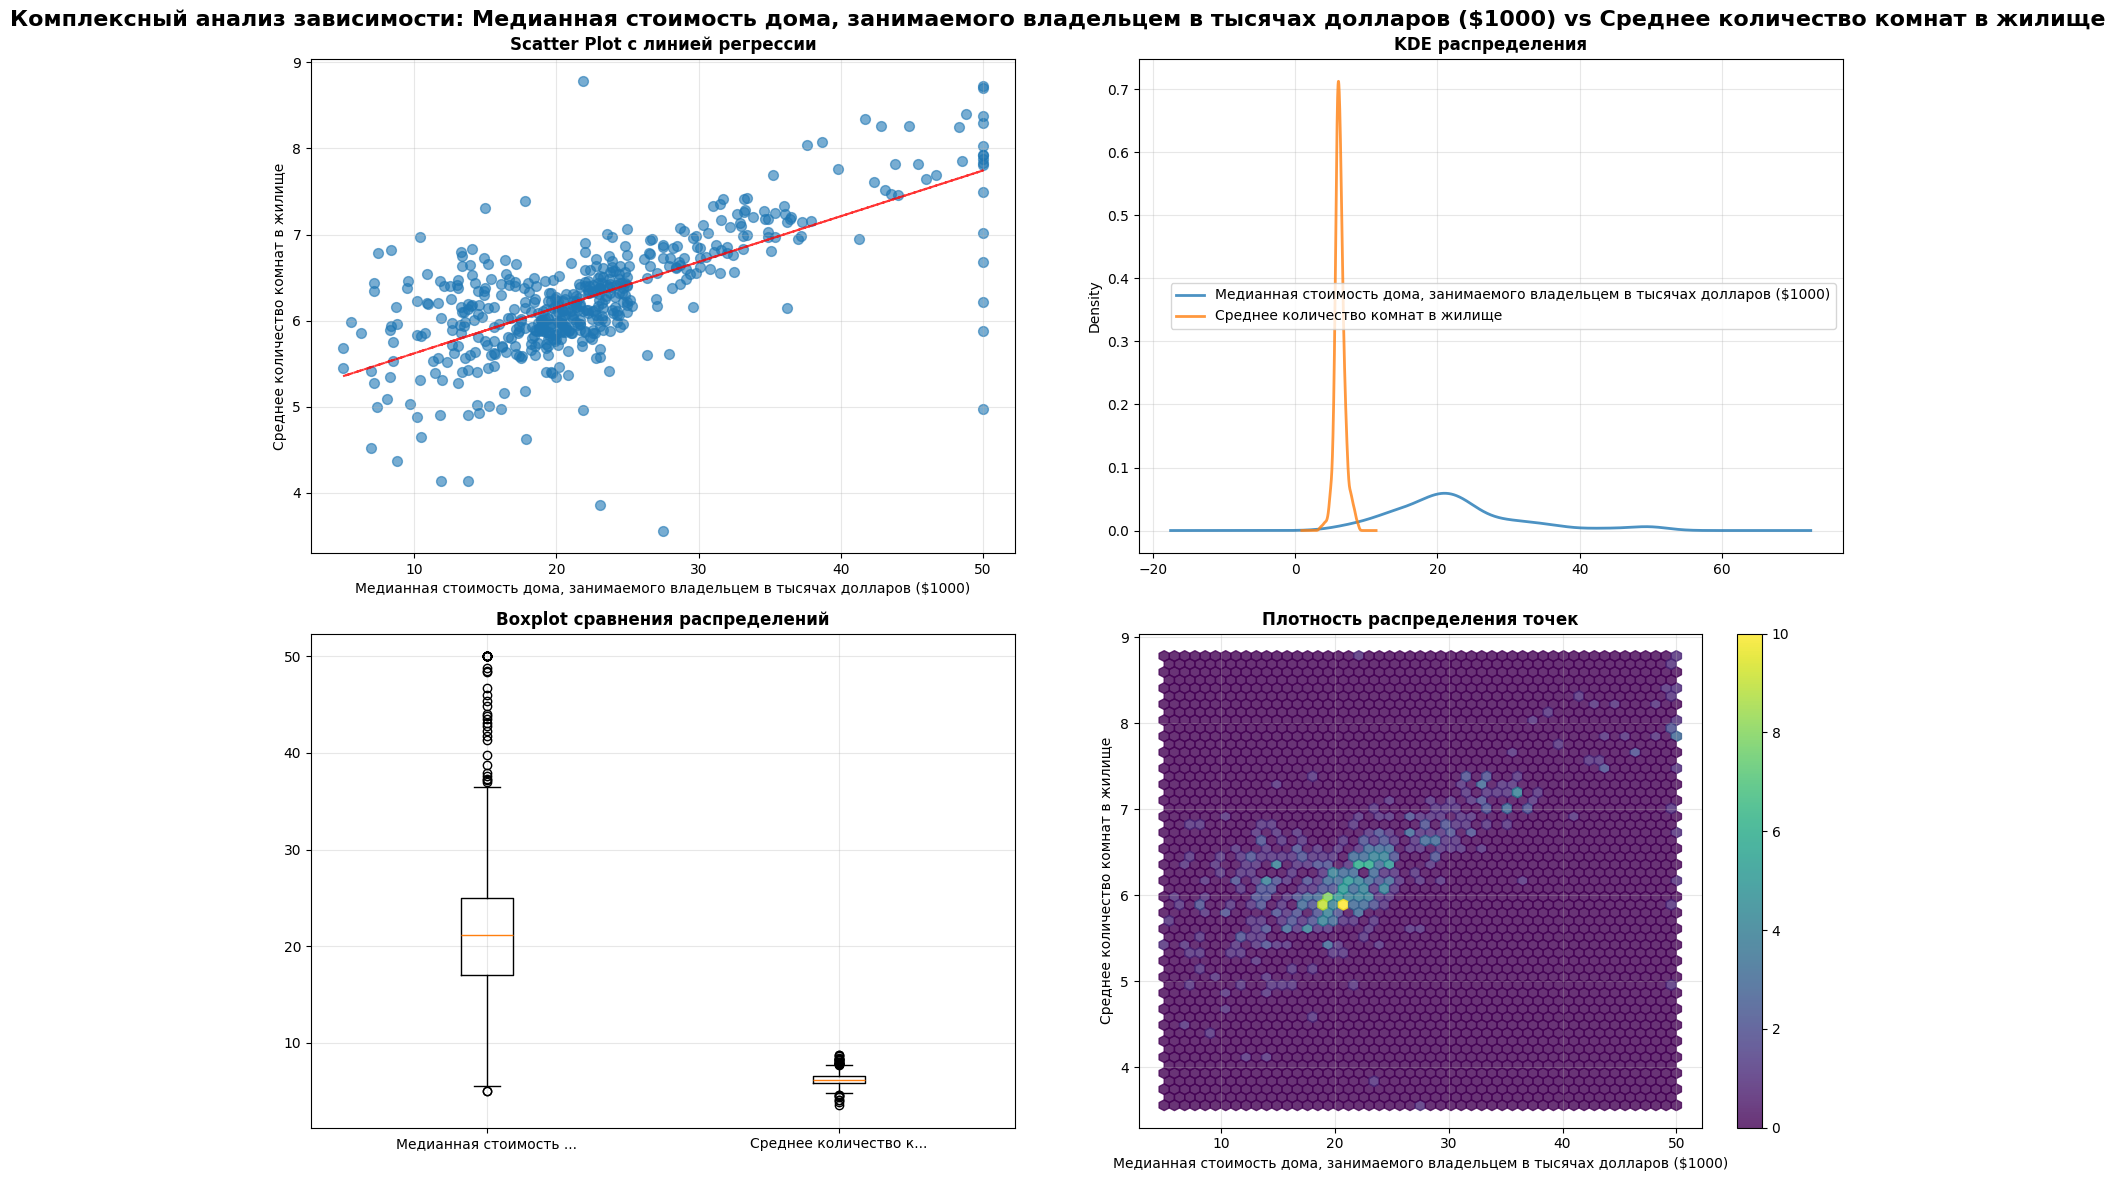


🔍 Дополнительный анализ:
Выбросы в Медианная стоим...: 40 (7.9%)
Выбросы в Среднее количес...: 30 (5.9%)

🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:
📈 СИЛА ЗАВИСИМОСТИ: СИЛЬНАЯ
📊 НАПРАВЛЕНИЕ: ПРЯМАЯ
🔷 ХАРАКТЕР: ЛИНЕЙНЫЙ
📝 ИНТЕРПРЕТАЦИЯ: увеличение одного показателя сопровождается увеличением другого

📋 ДЕТАЛИ:
• Коэффициент корреляции Пирсона: 0.695
• Коэффициент корреляции Спирмена: 0.634
• Зависимость статистически значима и имеет практическую ценность

💡 РЕКОМЕНДАЦИИ:
• Зависимость существенная, может быть полезна для анализа
• Рекомендуется дополнительное исследование
Анализ зависимости: Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) vs Доля домов, занятых владельцами, построенных до 1940 года
📊 Базовые статистики:
Корреляция Пирсона: -0.377
Корреляция Спирмена: -0.548
Ковариация: -97.589

📈 Описательная статистика:
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000): mean=22.53, std=9.20
Доля домов, занятых владельцами, построенных до 194

C:\Temp\ipykernel_59576\428560429.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])


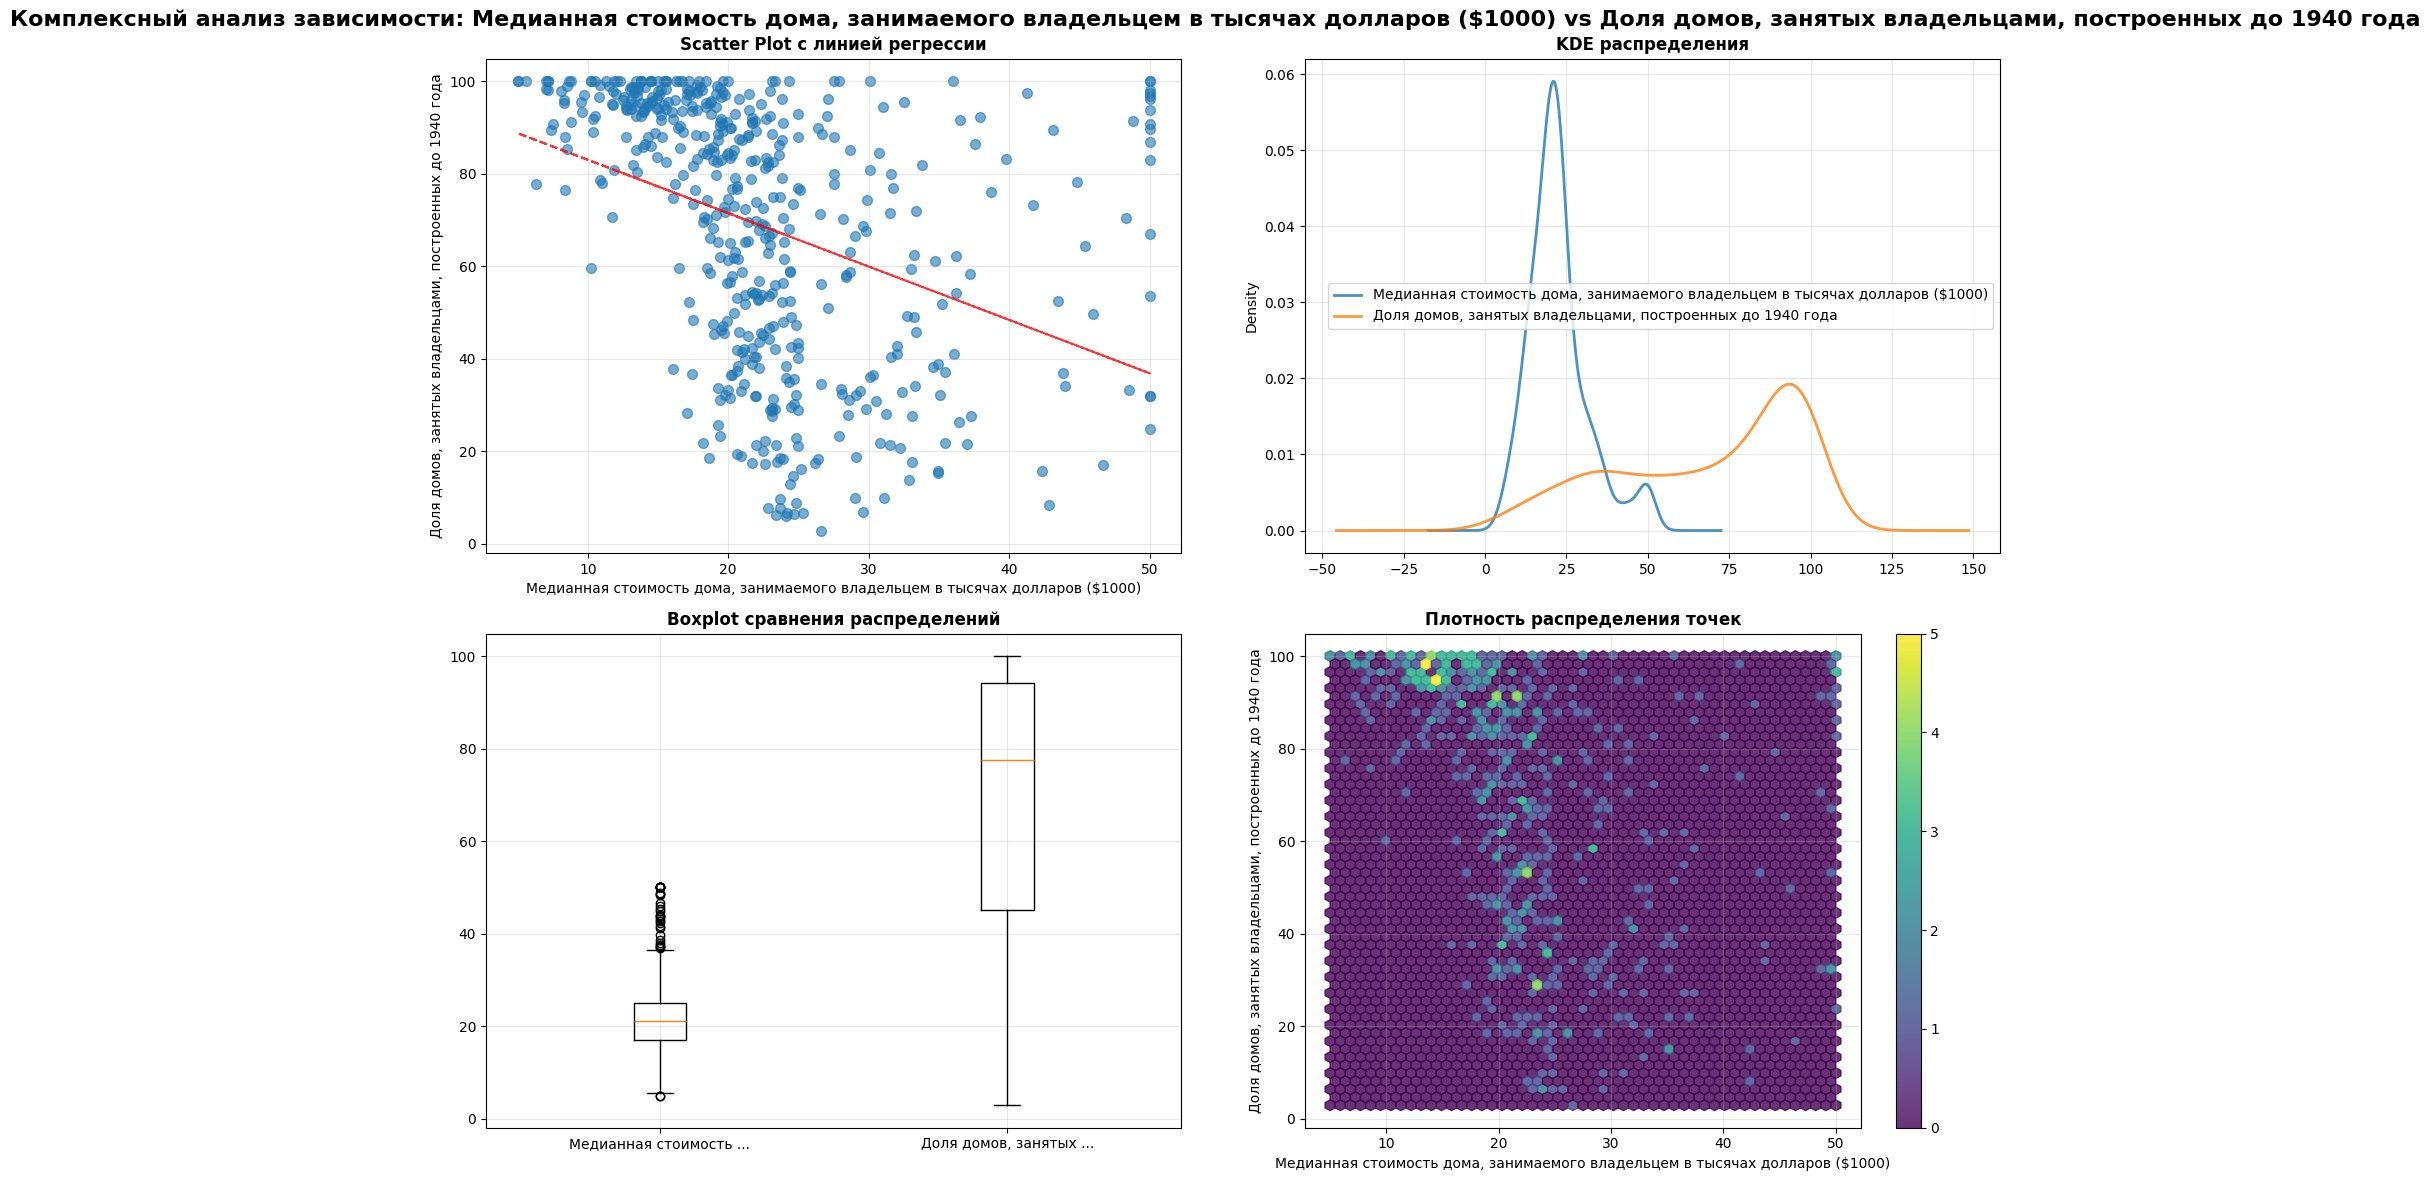


🔍 Дополнительный анализ:
Выбросы в Медианная стоим...: 40 (7.9%)
Выбросы в Доля домов, зан...: 0 (0.0%)

🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:
📈 СИЛА ЗАВИСИМОСТИ: УМЕРЕННАЯ
📊 НАПРАВЛЕНИЕ: ОБРАТНАЯ
🔷 ХАРАКТЕР: СМЕШАННЫЙ
📝 ИНТЕРПРЕТАЦИЯ: увеличение одного показателя сопровождается уменьшением другого

📋 ДЕТАЛИ:
• Коэффициент корреляции Пирсона: -0.377
• Коэффициент корреляции Спирмена: -0.548
• Зависимость умеренная, требует дополнительного анализа

💡 РЕКОМЕНДАЦИИ:
• Слабая зависимость, может потребовать конструирования признаков
• Рассмотрите нелинейные преобразования
Анализ зависимости: Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) vs Взвешенные расстояния до пяти бостонских центров занятости
📊 Базовые статистики:
Корреляция Пирсона: 0.250
Корреляция Спирмена: 0.446
Ковариация: 4.840

📈 Описательная статистика:
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000): mean=22.53, std=9.20
Взвешенные расстояния до пяти бостонских центров занят

C:\Temp\ipykernel_59576\428560429.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])


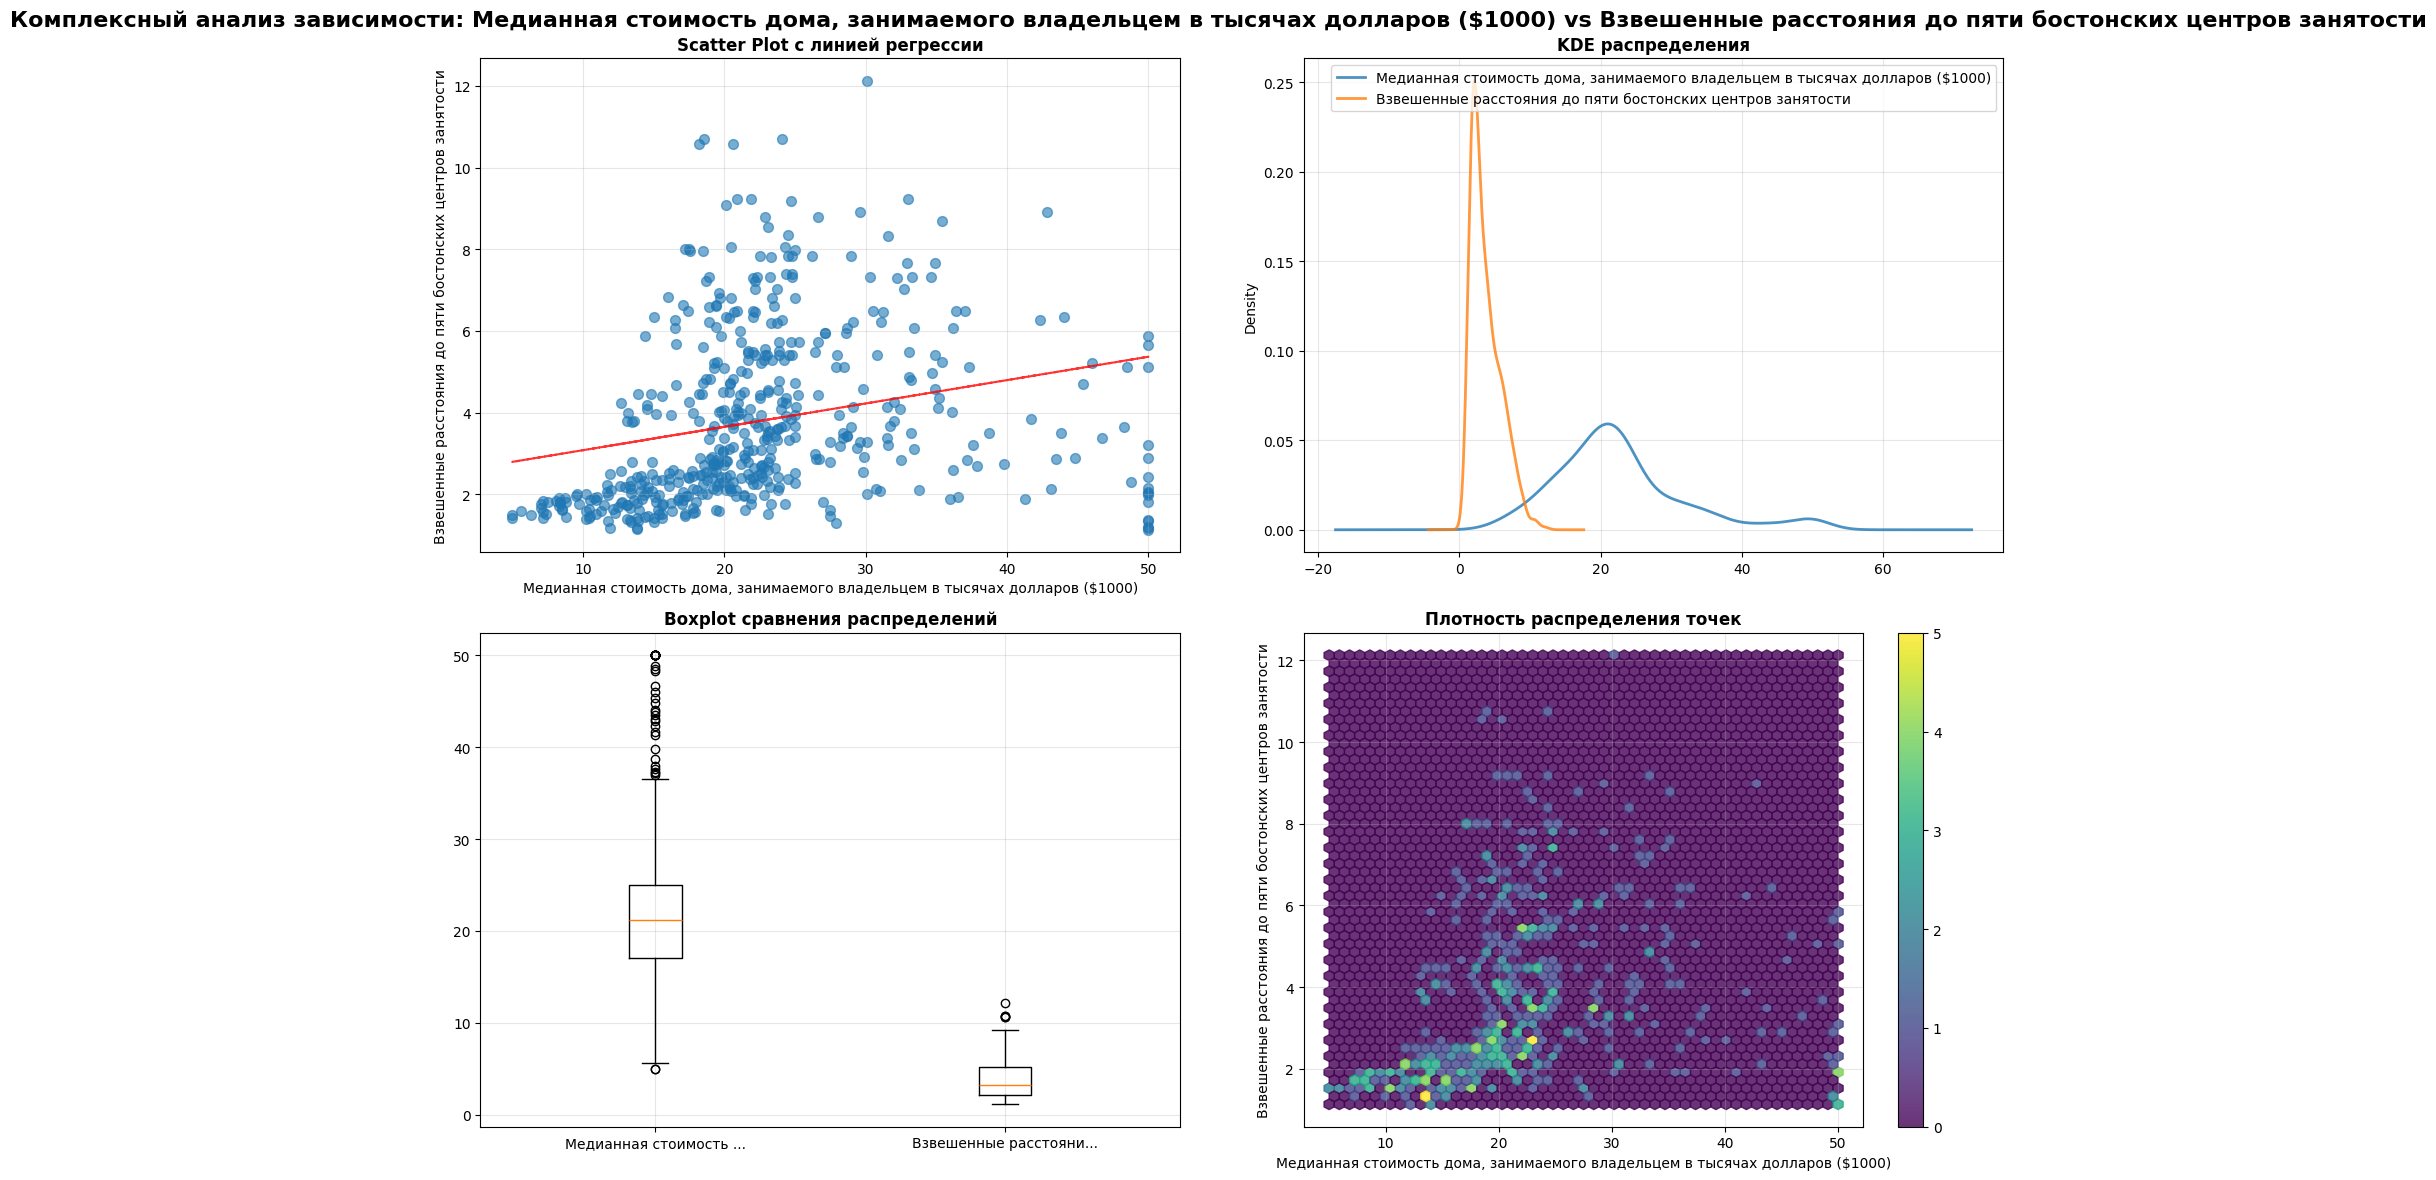


🔍 Дополнительный анализ:
Выбросы в Медианная стоим...: 40 (7.9%)
Выбросы в Взвешенные расс...: 5 (1.0%)

🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:
📈 СИЛА ЗАВИСИМОСТИ: СЛАБАЯ
📊 НАПРАВЛЕНИЕ: ПРЯМАЯ
🔷 ХАРАКТЕР: СМЕШАННЫЙ
📝 ИНТЕРПРЕТАЦИЯ: увеличение одного показателя сопровождается увеличением другого

📋 ДЕТАЛИ:
• Коэффициент корреляции Пирсона: 0.250
• Коэффициент корреляции Спирмена: 0.446
• Зависимость слабая, возможно случайная

💡 РЕКОМЕНДАЦИИ:
• Зависимость практически отсутствует
• Вероятно, переменные независимы
Анализ зависимости: Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) vs Индекс доступности к радиальным highways
📊 Базовые статистики:
Корреляция Пирсона: -0.382
Корреляция Спирмена: -0.347
Ковариация: -30.561

📈 Описательная статистика:
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000): mean=22.53, std=9.20
Индекс доступности к радиальным highways: mean=9.55, std=8.71


C:\Temp\ipykernel_59576\428560429.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])


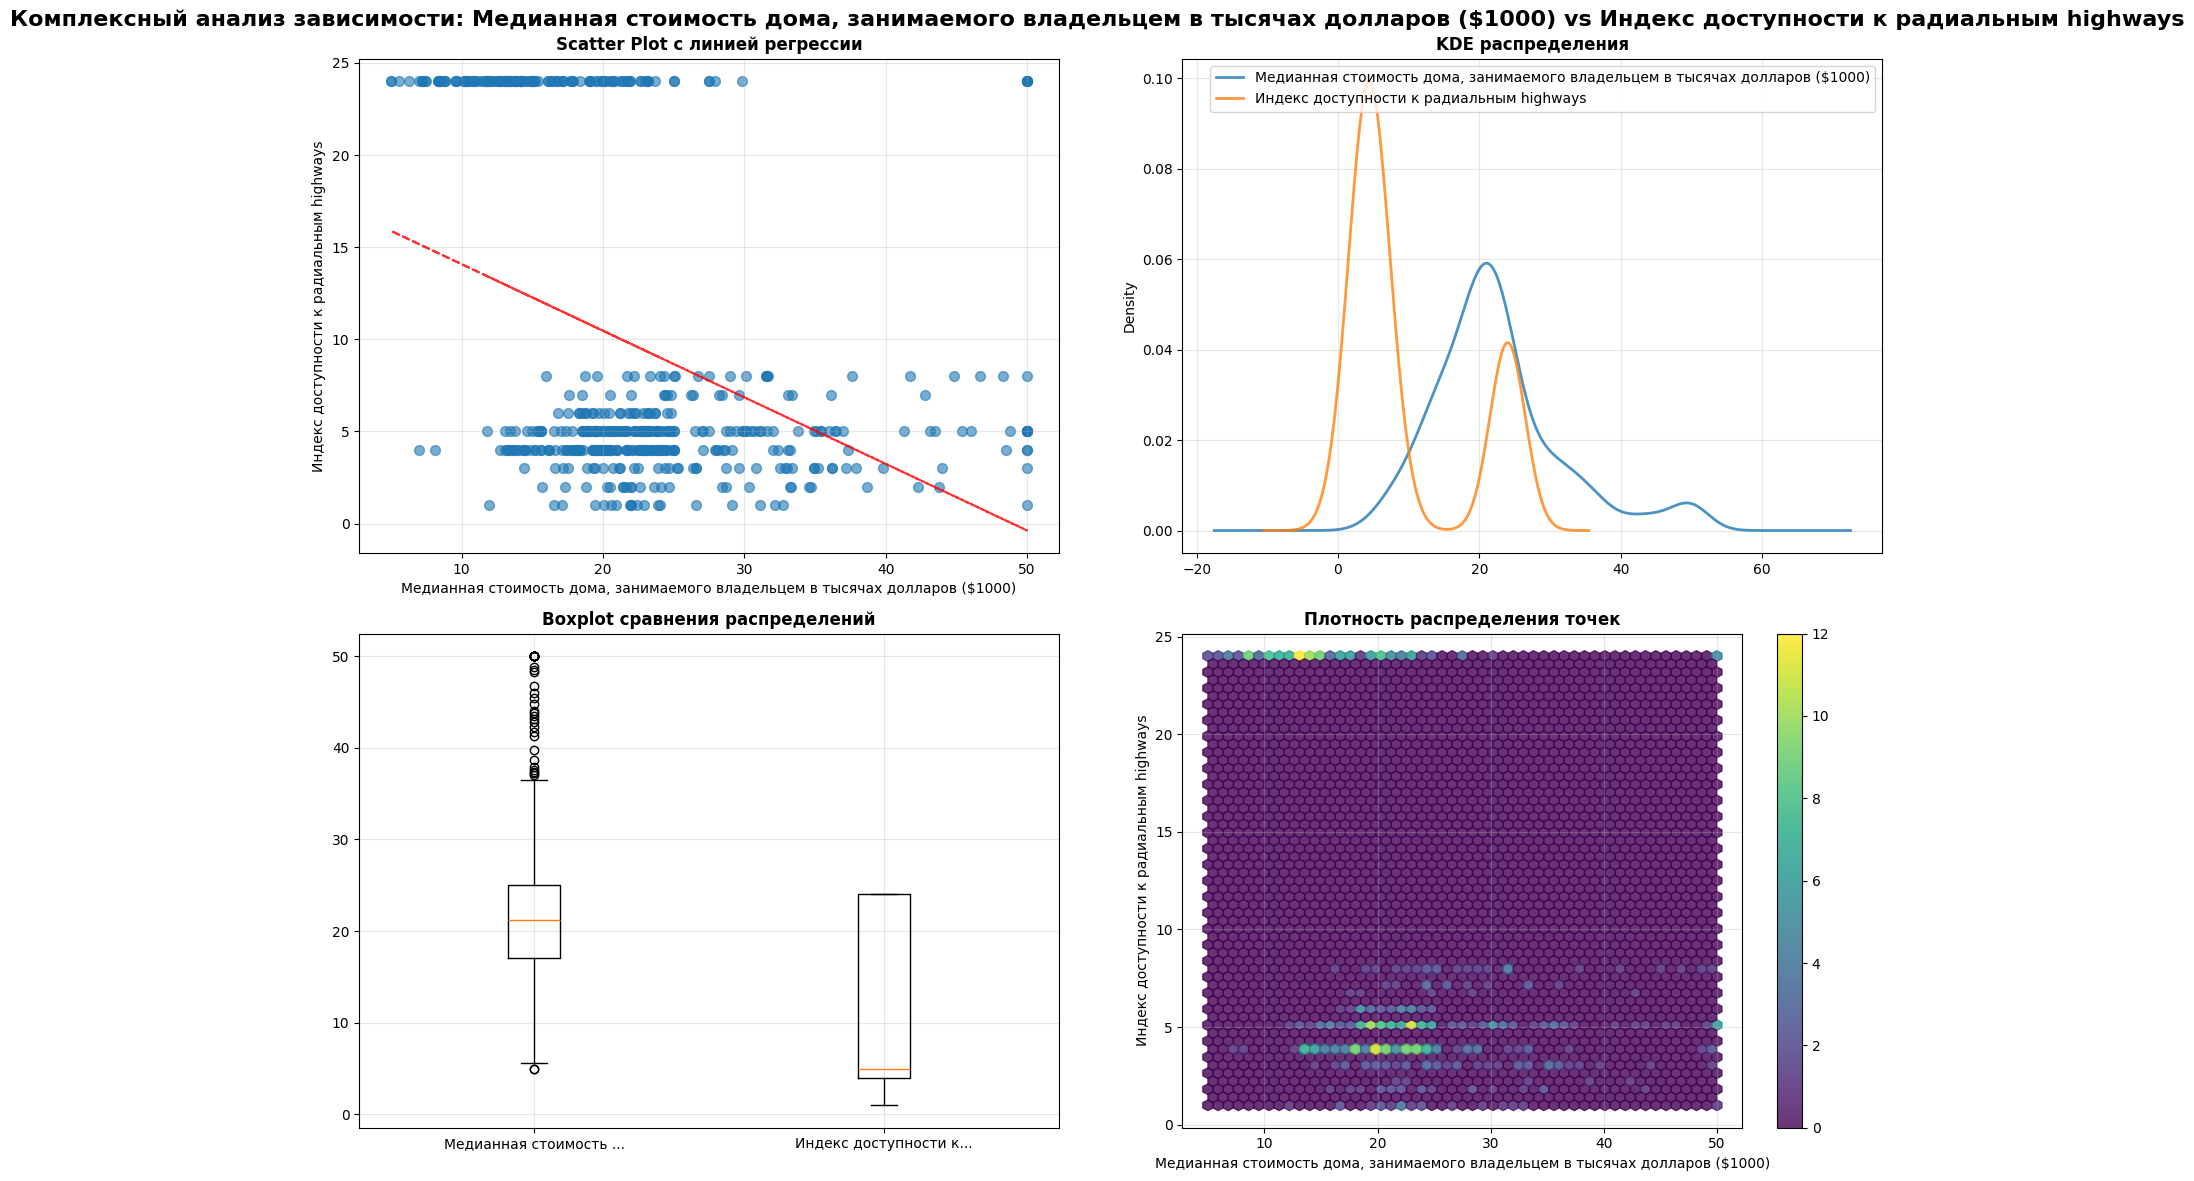


🔍 Дополнительный анализ:
Выбросы в Медианная стоим...: 40 (7.9%)
Выбросы в Индекс доступно...: 0 (0.0%)

🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:
📈 СИЛА ЗАВИСИМОСТИ: УМЕРЕННАЯ
📊 НАПРАВЛЕНИЕ: ОБРАТНАЯ
🔷 ХАРАКТЕР: ЛИНЕЙНЫЙ
📝 ИНТЕРПРЕТАЦИЯ: увеличение одного показателя сопровождается уменьшением другого

📋 ДЕТАЛИ:
• Коэффициент корреляции Пирсона: -0.382
• Коэффициент корреляции Спирмена: -0.347
• Зависимость умеренная, требует дополнительного анализа

💡 РЕКОМЕНДАЦИИ:
• Слабая зависимость, может потребовать конструирования признаков
• Рассмотрите нелинейные преобразования
Анализ зависимости: Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) vs Полная ставка налога на имущество за $10,000
📊 Базовые статистики:
Корреляция Пирсона: -0.469
Корреляция Спирмена: -0.562
Ковариация: -726.256

📈 Описательная статистика:
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000): mean=22.53, std=9.20
Полная ставка налога на имущество за $10,000: mean=408.24, std=1

C:\Temp\ipykernel_59576\428560429.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])


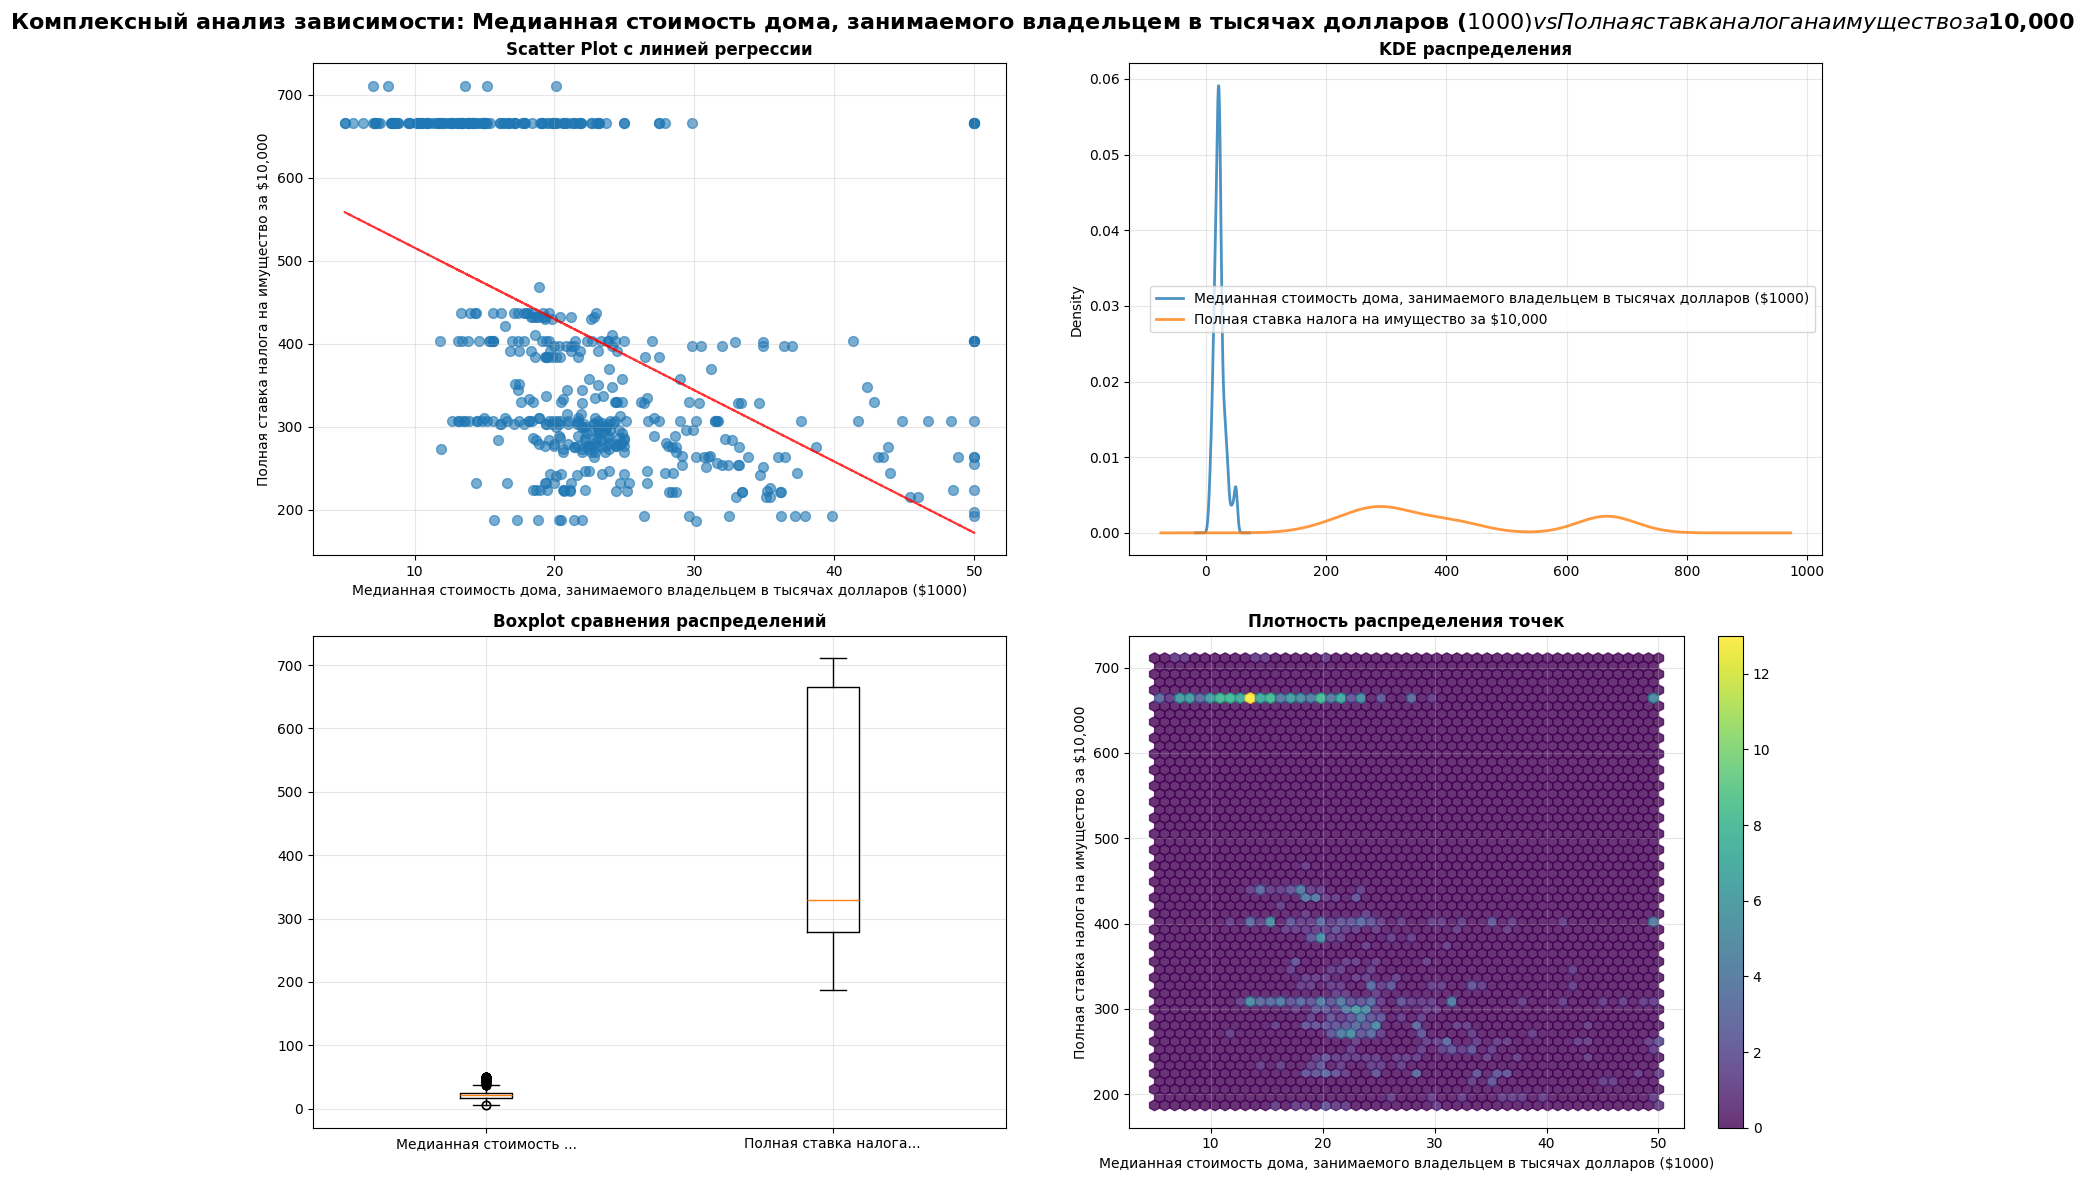


🔍 Дополнительный анализ:
Выбросы в Медианная стоим...: 40 (7.9%)
Выбросы в Полная ставка н...: 0 (0.0%)

🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:
📈 СИЛА ЗАВИСИМОСТИ: УМЕРЕННАЯ
📊 НАПРАВЛЕНИЕ: ОБРАТНАЯ
🔷 ХАРАКТЕР: ЛИНЕЙНЫЙ
📝 ИНТЕРПРЕТАЦИЯ: увеличение одного показателя сопровождается уменьшением другого

📋 ДЕТАЛИ:
• Коэффициент корреляции Пирсона: -0.469
• Коэффициент корреляции Спирмена: -0.562
• Зависимость умеренная, требует дополнительного анализа

💡 РЕКОМЕНДАЦИИ:
• Слабая зависимость, может потребовать конструирования признаков
• Рассмотрите нелинейные преобразования
Анализ зависимости: Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) vs Соотношение учеников и учителей по городам
📊 Базовые статистики:
Корреляция Пирсона: -0.508
Корреляция Спирмена: -0.556
Ковариация: -10.111

📈 Описательная статистика:
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000): mean=22.53, std=9.20
Соотношение учеников и учителей по городам: mean=18.46, std=2.16


C:\Temp\ipykernel_59576\428560429.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])


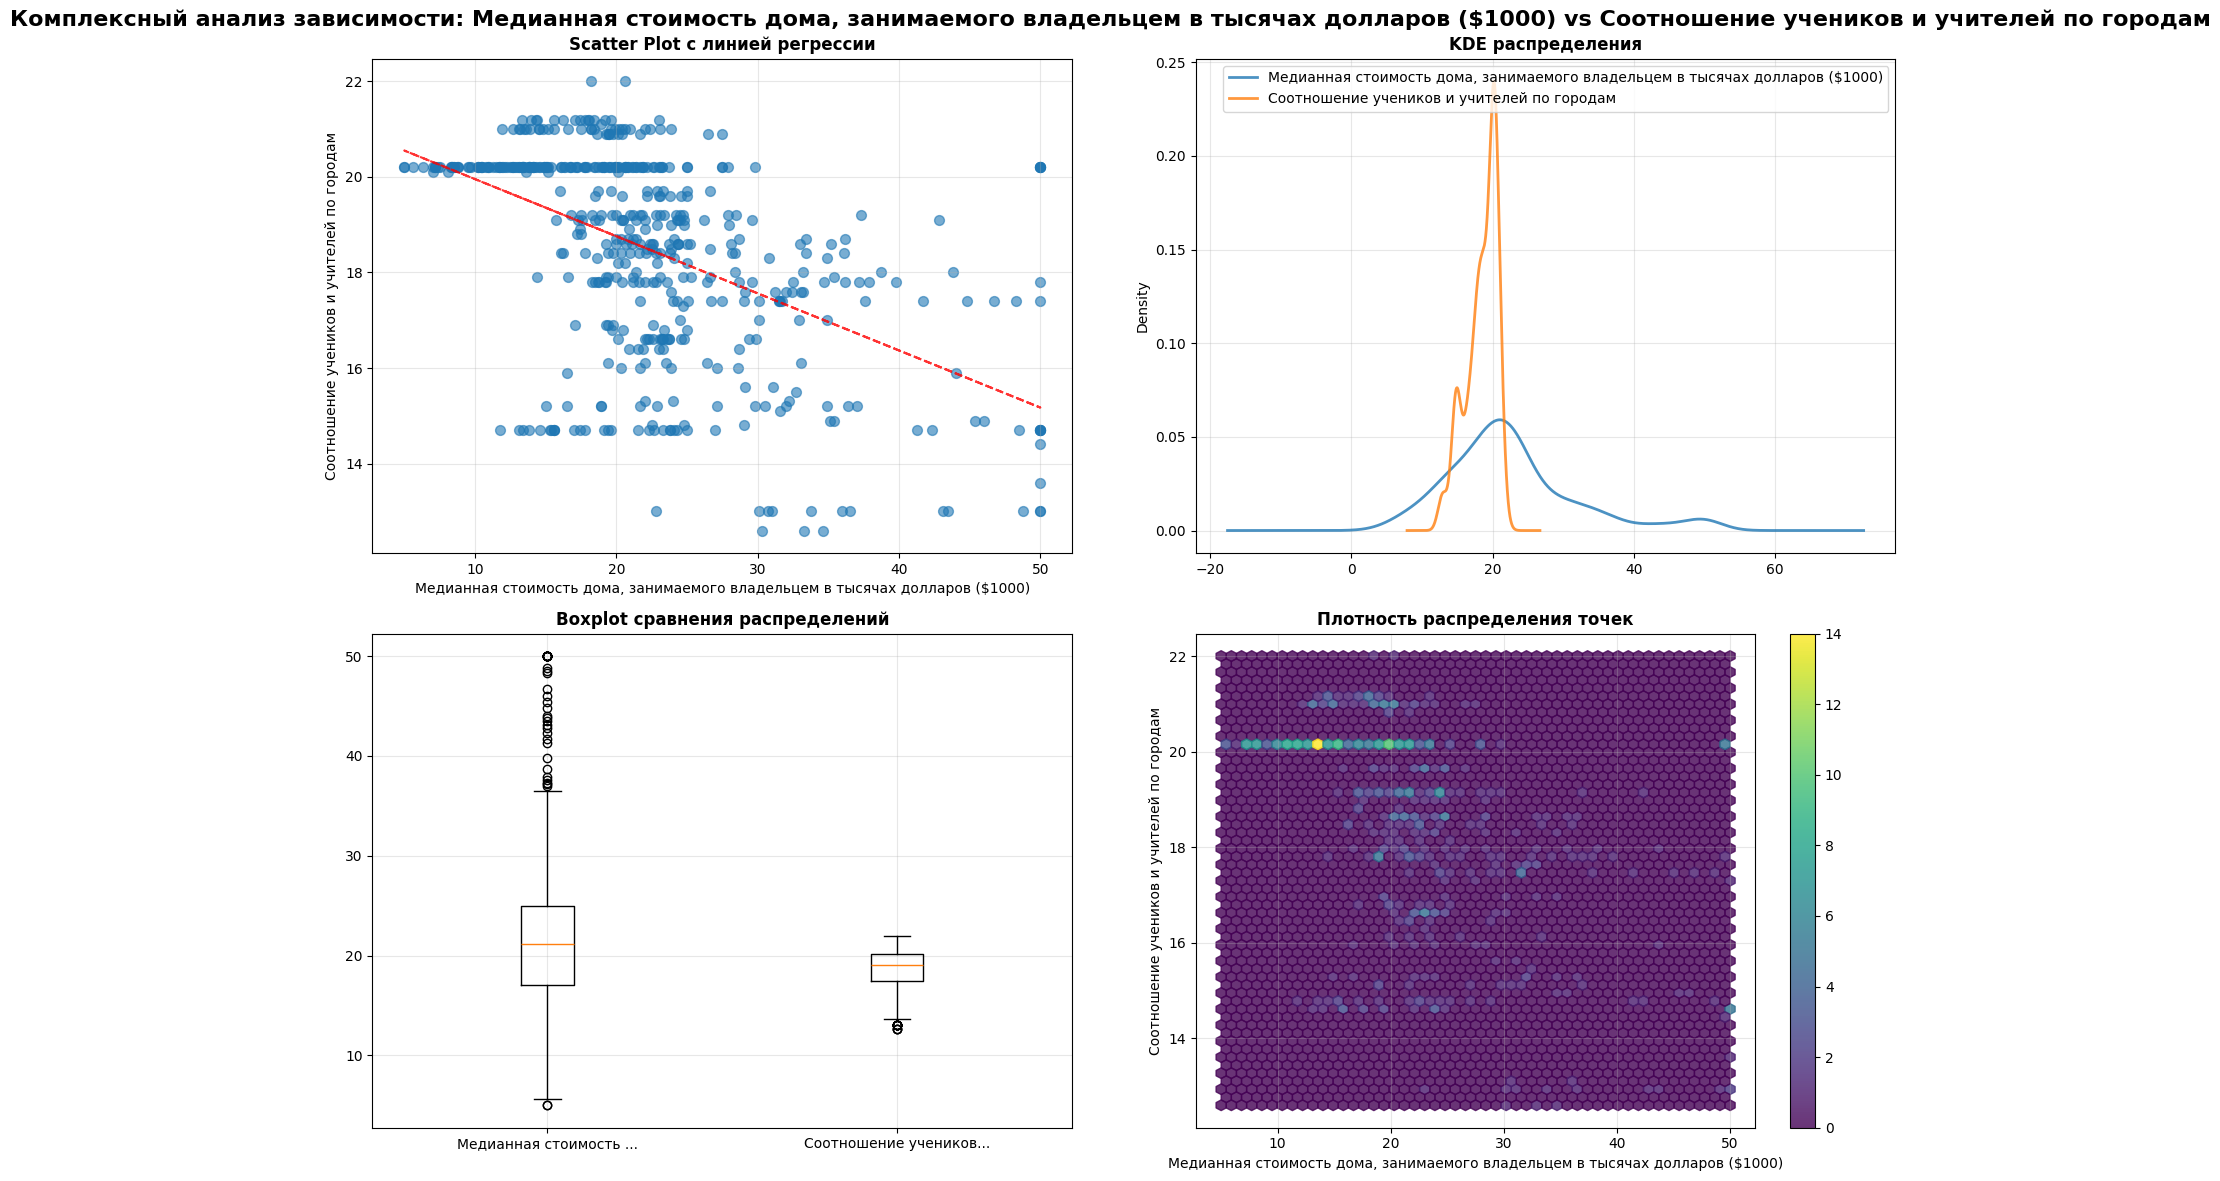


🔍 Дополнительный анализ:
Выбросы в Медианная стоим...: 40 (7.9%)
Выбросы в Соотношение уче...: 15 (3.0%)

🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:
📈 СИЛА ЗАВИСИМОСТИ: СИЛЬНАЯ
📊 НАПРАВЛЕНИЕ: ОБРАТНАЯ
🔷 ХАРАКТЕР: ЛИНЕЙНЫЙ
📝 ИНТЕРПРЕТАЦИЯ: увеличение одного показателя сопровождается уменьшением другого

📋 ДЕТАЛИ:
• Коэффициент корреляции Пирсона: -0.508
• Коэффициент корреляции Спирмена: -0.556
• Зависимость статистически значима и имеет практическую ценность

💡 РЕКОМЕНДАЦИИ:
• Зависимость существенная, может быть полезна для анализа
• Рекомендуется дополнительное исследование
Анализ зависимости: Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) vs 1000(Bk - 0,63)², где Bk - доля чернокожего населения по городам
📊 Базовые статистики:
Корреляция Пирсона: 0.333
Корреляция Спирмена: 0.186
Ковариация: 279.990

📈 Описательная статистика:
Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000): mean=22.53, std=9.20
1000(Bk - 0,63)², где Bk - доля чернокожег

C:\Temp\ipykernel_59576\428560429.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])


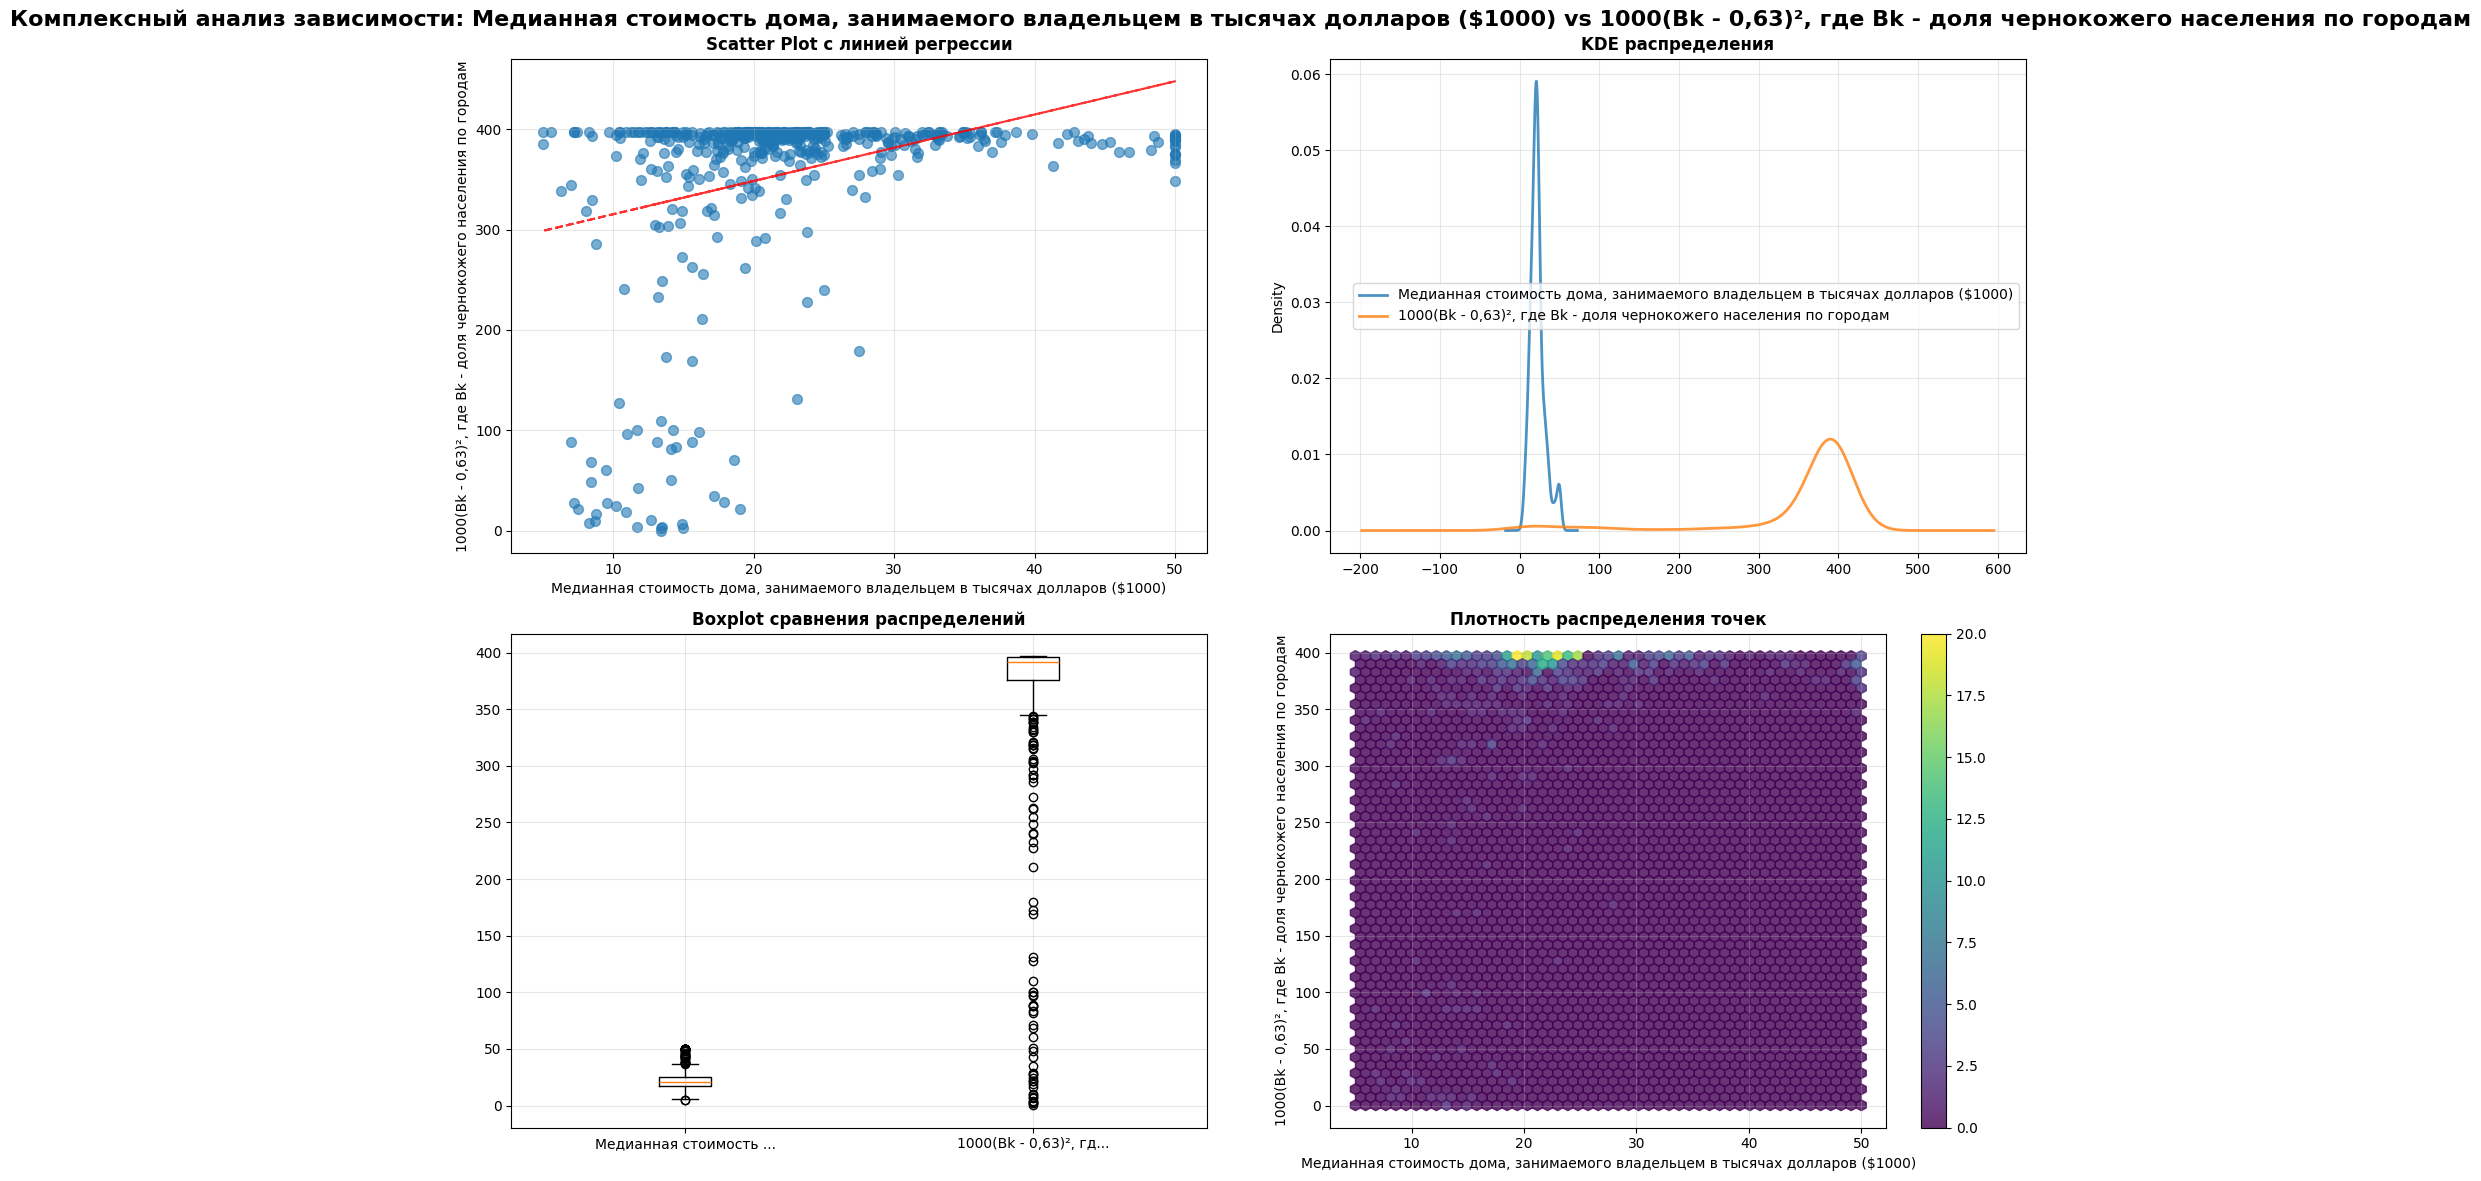


🔍 Дополнительный анализ:
Выбросы в Медианная стоим...: 40 (7.9%)
Выбросы в 1000(Bk - 0,63)...: 77 (15.2%)

🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:
📈 СИЛА ЗАВИСИМОСТИ: УМЕРЕННАЯ
📊 НАПРАВЛЕНИЕ: ПРЯМАЯ
🔷 ХАРАКТЕР: СМЕШАННЫЙ
📝 ИНТЕРПРЕТАЦИЯ: увеличение одного показателя сопровождается увеличением другого

📋 ДЕТАЛИ:
• Коэффициент корреляции Пирсона: 0.333
• Коэффициент корреляции Спирмена: 0.186
• Зависимость умеренная, требует дополнительного анализа

💡 РЕКОМЕНДАЦИИ:
• Слабая зависимость, может потребовать конструирования признаков
• Рассмотрите нелинейные преобразования

⚠️  ВНИМАНИЕ: Обнаружено много выбросов (>10%)
• Результаты могут быть искажены
• Рекомендуется анализ без выбросов
Анализ зависимости: Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000) vs процент населения с низким социально-экономическим статусом
📊 Базовые статистики:
Корреляция Пирсона: -0.738
Корреляция Спирмена: -0.853
Ковариация: -48.448

📈 Описательная статистика:
Медианная стоимость дома, занима

C:\Temp\ipykernel_59576\428560429.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=[col1[:20] + '...', col2[:20] + '...'])


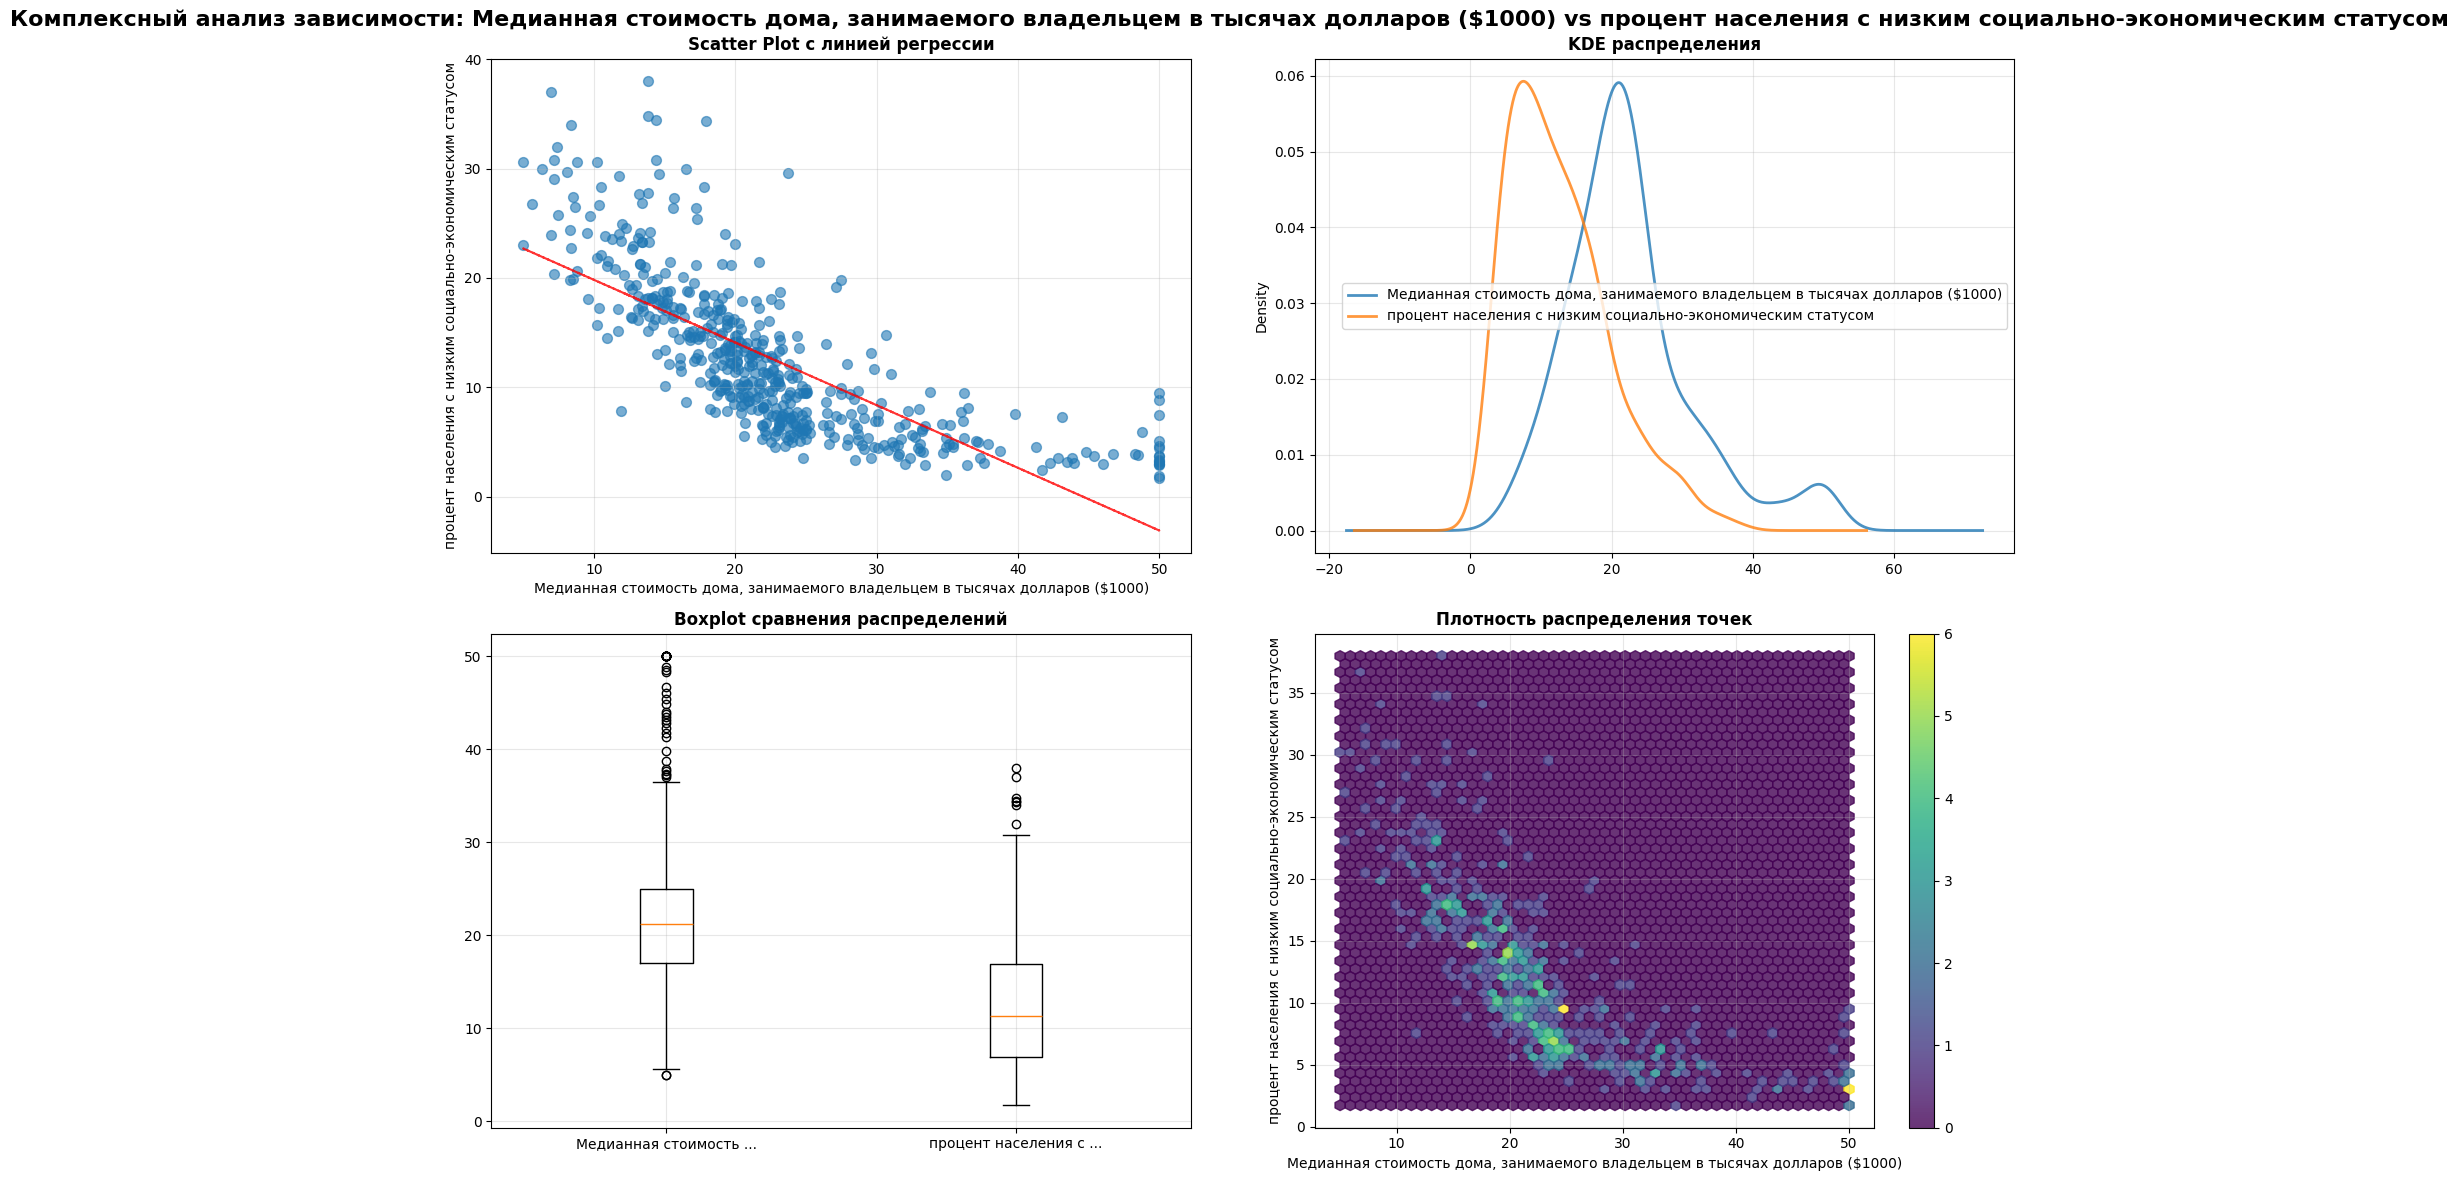


🔍 Дополнительный анализ:
Выбросы в Медианная стоим...: 40 (7.9%)
Выбросы в процент населен...: 7 (1.4%)

🎯 ИТОГОВЫЙ ВЫВОД О ЗАВИСИМОСТИ:
📈 СИЛА ЗАВИСИМОСТИ: ОЧЕНЬ СИЛЬНАЯ
📊 НАПРАВЛЕНИЕ: ОБРАТНАЯ
🔷 ХАРАКТЕР: СМЕШАННЫЙ
📝 ИНТЕРПРЕТАЦИЯ: увеличение одного показателя сопровождается уменьшением другого

📋 ДЕТАЛИ:
• Коэффициент корреляции Пирсона: -0.738
• Коэффициент корреляции Спирмена: -0.853
• Зависимость статистически значима и имеет практическую ценность

💡 РЕКОМЕНДАЦИИ:
• Переменные сильно связаны, могут быть полезны для прогнозирования
• Рассмотрите включение в модель машинного обучения


In [110]:
col1 = "Медианная стоимость дома, занимаемого владельцeм в тысячах долларов ($1000)"
importlib.reload(plt)
for col in data.columns[:-1]:
    col2 = col
    comprehensive_dependency_analysis(data,col1=col1,col2=col2)